# **Funding the Fight: How COVID-19 Relief Funding Affected US Hospital Finances and Resource Allocation**
**Contributors**: Jooyeon Lee, Wenxin Liang , Wenlin Zhao, Yiyou Chen
, Mohammed Zaid Bin Haris

# Executive Summary

This analysis investigates the financial dynamics of U.S. hospitals during the COVID-19 pandemic, focusing on how external funding, particularly the COVID-19 public health emergency (PHE) funding, impacted hospitals' capacity to respond to the crisis. By analyzing hospital financial data, infection rates, and PRF distribution, the study reveals the relationship between financial support, operational efficiency, and patient care during an unprecedented public health emergency. Visualizations highlight insights into the financial preparedness of hospitals pre-pandemic, the disparities in funding eligibility across regions, and the early operational pressures hospitals faced as COVID-19 surged.The findings provide valuable insights of how healthcare funding influences hospitals' ability to respond in real time to crises. Going forward, the analysis explores state-level funding distribution and the broader implications of government support on hospital financial stability. The ultimate goal is to deliver actionable insights that can shape future public health strategies and optimize relief fund allocation for better hospital resilience in future emergencies.




# Table of Contents

## I. Introduction

## II. Data Action
- A. Data Preparation
- B. Data Cleaning
- C. Data Cleaning

## III. Exploratory Analysis
- A. Basic Exploratory
- B. Summary for Basic Exploratory

## IV. Detailed Analysis
- A. Funded vs Non-Funded Hospital Comparison
- B. Funding Allocation
- C. Summary for Detailed Analysis

## V. Conclusions

## VI. Challenges

## VII. References

## VIII. Generative AI Disclosure




#I. Introduction & Proposal

This analysis offers key insights into the financial and operational impacts of COVID-19 on U.S. hospitals, with a focus on how external funding, such as the COVID-19 Public Health Emergency (PHE) funding, influenced hospital performance. By analyzing the relationship between financial support and hospital outcomes, this study sheds light on how funding shaped hospitals' ability to maintain services during the crisis. These findings are crucial for policymakers and healthcare leaders aiming to improve funding distribution and enhance hospital resilience during future emergencies. Readers will gain a clearer understanding of how financial constraints, operational efficiency, and funding disparities impacted hospitals' pandemic responses, making this analysis essential for shaping future public health strategies.










**Business Problem Definition**

The purpose of our analysis is to use data-driven insights to assess how U.S. hospital finances, particularly through external funding like the COVID-19 public health emergency (PHE) funding, impacted their ability to respond to the COVID-19 pandemic and maintain health resilience. We aim to analyze the financial pressures hospitals faced, evaluate the effectiveness of the funding distribution, and understand how these factors influenced hospital operations and patient care during the crisis.




**Motivation:** Our motivation lies in the critical role hospitals play in public health emergencies, especially during unprecedented crises like COVID-19. By leveraging financial and operational data, we aim to provide actionable insights into how external funding helped hospitals manage the pandemic's challenges. These insights are essential for developing more efficient healthcare funding strategies and ensuring hospitals are better prepared for future public health emergencies.








**Data Source:**
*   The National Academy for State Health Policy’s (NASHP) Hospital Cost Tool(https://tool.nashp.org)

*   United States COVID-19 Community Levels by County (https://data.cdc.gov/Public-Health-Surveillance/United-States-COVID-19-Community-Levels-by-County/3nnm-4jni/about_data)


*   Provider Relief Fund by State (https://data.cdc.gov/Administrative/Provider-Relief-Fund-by-State/egkx-k86t)

# II. Data Wrangling and Exploration


## **A. Data Preparation**

In [ ]:
# Importing necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm
!pip install plotly_express -q
import plotly_express as px
from sklearn.cluster import KMeans
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
HHS = pd.read_csv('/content/gdrive/MyDrive/780_Group/HHS_Provider_Relief_Fund_20240921.csv')
NASHP = pd.read_excel('/content/gdrive/MyDrive/780_Group/NASHP_HCT_Data_2024_July.xlsx')
USCOVID = pd.read_csv('/content/gdrive/MyDrive/780_Group/United_States_COVID-19_Community_Levels_by_County_20240921.csv')

In [ ]:
NASHP.head()

,CCN#,Facility Type,Year,Fiscal Year Beginning,Fiscal Year Ending,Hospital Name,Hospital Abbreviated Name,Address,Zip Code,City,...,Hospital Expenses (Inclusive of All Services),Direct Patient Care Labor Cost as % of Hospital Expenses (Inclusive of All Services),Labor Cost Other than Direct Patient Care Labor as % of Hospital Expenses (Inclusive of All Services),Capital Related Costs as % of Hospital Expenses (Inclusive of All Services),Other Hospital Operating Costs as % of Hospital Expenses (Inclusive of All Services),Additional Operating Expenses not related to Patient Care as % of Hospital Expenses (Inclusive of All Services),Management and Administrative Labor Cost,Overhead Labor Cost,Home Office and Affiliates Labor Cost,Multiple MCRs
0,10001,Short Term (General and Specialty) Hospitals,2011,2010-10-01,2011-09-30,SOUTHEAST ALABAMA MEDICAL CENTER,SE AL MC,1108 ROSS CLARK CIRCLE,36301,DOTHAN,...,267292928,0.274393,0.150398,0.081577,0.286699,0.206934,26064799.358199,14135539.618633,.,0
1,10001,Short Term (General and Specialty) Hospitals,2012,2011-10-01,2012-09-30,SOUTHEAST ALABAMA MEDICAL CENTER,SE AL MC,1108 ROSS CLARK CIRCLE,36301,DOTHAN,...,274011907,0.267676,0.146274,0.07728,0.281166,0.227604,26335712.400206,13745166.109132,.,0
2,10001,Short Term (General and Specialty) Hospitals,2013,2012-10-01,2013-09-30,SOUTHEAST ALABAMA MEDICAL CENTER,SE AL MC,1108 ROSS CLARK CIRCLE,36301,DOTHAN,...,284850485,0.270142,0.147356,0.054145,0.280817,0.24754,27774973.892041,14199377.200408,.,0
3,10001,Short Term (General and Specialty) Hospitals,2014,2013-10-01,2014-09-30,SOUTHEAST ALABAMA MEDICAL CENTER,SE AL MC,1108 ROSS CLARK CIRCLE,36301,DOTHAN,...,313050295,0.248548,0.13799,0.061535,0.293118,0.258808,28629464.513098,14568455.091815,.,0
4,10001,Short Term (General and Specialty) Hospitals,2015,2014-10-01,2015-09-30,SOUTHEAST ALABAMA MEDICAL CENTER,SE AL MC,1108 ROSS CLARK CIRCLE,36301,DOTHAN,...,320701028,0.257322,0.139546,0.062206,0.285852,0.255073,29950187.643967,14802406.812156,.,0


## **B. Data Cleaning**

In the data cleaning process, we focused on retaining the most relevant information for our hospital funding analysis. First, we limited the data to the years 2017-2022 to capture the funding trends before, during, and after the COVID-19 pandemic. We then eliminated unnecessary columns, such as hospital addresses and administrative details, to streamline the dataset. Particular attention was given to the COVID-19 PHE Funding column, which was vital for distinguishing hospitals that received pandemic-related funding from those that did not. Missing values in key financial columns were filled with zeros where appropriate to ensure consistency without distorting the analysis. Finally, we standardized and merged data from NASHP, HHS, and USCOVID sources to enable a comprehensive analysis of hospital finances and COVID-19 impacts.

In [ ]:
# clean NASHP
# drop rows from 2011 - 2016
NASHP = NASHP[~NASHP['Year'].isin([2011, 2012, 2013, 2014, 2015, 2016])]
NASHP_covid = NASHP[~NASHP['Year'].isin([2017, 2018, 2019 ,2022])]



In [ ]:
# drop useless columns
NASHP.drop(columns=[' Facility Type', 'Hospital Abbreviated Name', 'Address', 'Fiscal Year Beginning', 'Fiscal Year Ending', 'CCN#'], inplace=True)
NASHP.drop(columns = ['Zip Code', 'City', 'Health System ID', 'Health System', 'Independent', 'Hospital Charges' ], inplace = True)
NASHP.drop(columns=['Cost-to-Charge Ratio', 'Charges as % of Costs', 'Uninsured and Bad Debt Cost as % of Net Patient Revenue', 'Uninsured and Bad Debt Cost as % of Hospital Expenses (Inclusive of All Services)', 'Uninsured and Bad Debt Payer Mix', 'Charity Care Payer Mix','Net Charity Care Cost as % of Net Patient Revenue', 'Net Charity Care Cost as % of Hospital Expenses (Inclusive of All Services)'], inplace=True)
columns_to_drop = NASHP.loc[:, 'Charity Care and Uninsured and Bad Debt Payer Mix':'Multiple MCRs'].columns
columns_to_drop = columns_to_drop.difference(['Direct Patient Care Hospital Labor Cost', 'COVID-19 PHE Funding'])
NASHP = NASHP.drop(columns=columns_to_drop)

NASHP_covid.drop(columns=[' Facility Type', 'Hospital Abbreviated Name', 'Address', 'Fiscal Year Beginning', 'Fiscal Year Ending', 'CCN#'], inplace=True)
NASHP_covid.drop(columns = ['Zip Code', 'City', 'Health System ID', 'Health System', 'Independent', 'Hospital Charges' ], inplace = True)
NASHP_covid.drop(columns=['Cost-to-Charge Ratio', 'Charges as % of Costs', 'Uninsured and Bad Debt Cost as % of Net Patient Revenue', 'Uninsured and Bad Debt Cost as % of Hospital Expenses (Inclusive of All Services)', 'Uninsured and Bad Debt Payer Mix', 'Charity Care Payer Mix','Net Charity Care Cost as % of Net Patient Revenue', 'Net Charity Care Cost as % of Hospital Expenses (Inclusive of All Services)'], inplace=True)
columns_to_drop_covid = NASHP_covid.loc[:, 'Charity Care and Uninsured and Bad Debt Payer Mix':'Multiple MCRs'].columns
columns_to_drop_covid = columns_to_drop_covid.difference(['Direct Patient Care Hospital Labor Cost', 'COVID-19 PHE Funding'])
NASHP_covid = NASHP_covid.drop(columns=columns_to_drop_covid)

<ipython-input-6-5c100babd61d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASHP_covid.drop(columns=[' Facility Type', 'Hospital Abbreviated Name', 'Address', 'Fiscal Year Beginning', 'Fiscal Year Ending', 'CCN#'], inplace=True)
<ipython-input-6-5c100babd61d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASHP_covid.drop(columns = ['Zip Code', 'City', 'Health System ID', 'Health System', 'Independent', 'Hospital Charges' ], inplace = True)
<ipython-input-6-5c100babd61d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

For the missing value or null, we replace them with 0 since we cannot anticipate those numbers resonably. For example, in the COVID-19 PHE Funding, we should not fill the missing data with specific numbers since there should not be fund before or after the covid, so we just fill the missing values with zero.

In [ ]:
# fill the missing by 0
NASHP.fillna(0, inplace = True)
NASHP.replace('.', 0, inplace=True)

NASHP_covid.fillna(0, inplace = True)
NASHP_covid.replace('.', 0, inplace=True)

<ipython-input-7-ba3541644b7b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  NASHP.replace('.', 0, inplace=True)
<ipython-input-7-ba3541644b7b>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  NASHP_covid.replace('.', 0, inplace=True)


Dataset Overview

The following table explains each feature in the NASHP dataset.

| Feature                           | Description                                                                                                            | Unit  |
|:----------------------------------|:-----------------------------------------------------------------------------------------------------------------------|:-----:|
| Year                              | Reporting Year, based on Hospital Fiscal Year ending date.                                                             | /     |
| Hospital Name                     | Name of Hospital.                                                                                                      | /     |
| City                              | Hospital location city.                                                                                                | /     |
| State                             | Hospital location state.                                                                                               | /     |
| Hospital Ownership Type           | Hospital ownership classification (Non-Profit, For-Profit, or Governmental).                                           | /     |
| Bed Size                          | Number of available beds for inpatient care. Does not include beds in outpatient areas or emergency rooms.             | beds  |
| Inpatient Occupancy               | Percentage of available beds occupied for inpatient care during the reporting year.                                    | %     |
| Net Patient Revenue               | Gross patient charges, minus contractual discounts, bad debt, charity care allowances, and other deductions.           | USD   |
| Operating Expenses                | Hospital Operating Expenses, as recorded in hospital accounting records.                                               | USD   |
| Net Income (Loss)                 | Net Patient Revenue minus Operating Expenses plus Other Income and Expense. Represents earnings retained by the hospital. | USD   |
| Net Profit Margin                 | Net Income divided by Net Patient Revenue, representing the percentage of Net Patient Revenue retained by the hospital. | %     |
| Fund Balance                      | General Fund Balance adjusted for Specific Purpose Funds and Donor Endowment Fund Balances.                            | USD   |
| Net Charity Care Cost             | Portion of Hospital Operating Costs for patient care under Charity Care policy, minus charity care patient payments.   | USD   |
| Net Charity Care Cost as % of Net Patient Revenue | Net Charity Care Cost divided by Net Patient Revenue, representing the percentage used for charity care patients. | %     |
| Net Charity Care Cost as % of Hospital Expenses (Inclusive of All Services) | Net Charity Care Cost divided by Hospital Expenses, representing charity care costs as part of total expenses. | %     |
| Uninsured and Bad Debt Cost       | Costs of providing patient care not reimbursed by uninsured or insured patients.                                       | USD   |
| Uninsured and Bad Debt Cost as % of Net Patient Revenue | Cost for uninsured/bad debt care as a percentage of Net Patient Revenue.                                               | %     |
| Uninsured and Bad Debt Cost as % of Hospital Expenses (Inclusive of All Services) | Uninsured and Bad Debt Cost as part of total Hospital Expenses.                                              | %     |

For the data in HHS file, we just frop some columns we would not use in our analysis. For the USCOVID data, we also drop the useless columns, and also shift the full state name to the abbreviation of the state for future possible merge of datasets.

In [ ]:
# clean HHS
# drop useless columns
columns_to_drop = ['Provider Name', 'City']
columns_to_drop = [col for col in columns_to_drop if col in HHS.columns]
HHS.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# clean USVOCID
# drop useless columns
USCOVID.drop(columns = ['county_fips', 'health_service_area_number', 'health_service_area', 'health_service_area_population', 'date_updated'], inplace = True)
USCOVID.dropna(inplace=True)

# change state name to abbreviation
USCOVID['state'] = USCOVID['state'].str.strip().str.title()

state_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    # Additional U.S. Territories
    'Puerto Rico': 'PR', 'United States Virgin Islands': 'VI', 'American Samoa': 'AS',
    'Guam': 'GU', 'Commonwealth of the Northern Mariana Islands': 'MP', 'District of Columbia': 'DC'
}
USCOVID['state'] = USCOVID['state'].map(state_abbreviation)

# III. Exploratory Analysis

## A: Basic Exploratory

In [ ]:
NASHP.head()

,Year,Hospital Name,State,Hospital Ownership Type,Bed Size,Inpatient Occupancy,Net Patient Revenue,Operating Expenses,Other Income and Expense,Net Income (Loss),Net Profit Margin,Fund Balance,Hospital Operating Costs,Net Charity Care Cost,Uninsured and Bad Debt Cost,COVID-19 PHE Funding,Direct Patient Care Hospital Labor Cost
6,2017,SOUTHEAST ALABAMA MEDICAL CENTER,AL,Governmental,387,0.703090,325106921,344247883,26079507,6938545,0.021342,251040868,250461168,4161972,16514235,0,8.519957e+07
7,2018,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,327,0.800637,340882061,352067099,16191769,5006731,0.014688,243813389,262408300,4034798,17747606,0,8.730086e+07
8,2019,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,342,0.795346,381021338,388885121,23029582,15165799,0.039803,257463398,289931440,11025384,14721572,0,9.343083e+07
9,2020,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,332,0.795971,386129795,392753995,32890377,26266177,0.068024,282529903,297431697,19188161,6678369,0,9.581743e+07
10,2021,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,326,0.853920,398171158,421790546,37374045,13754657,0.034545,296134053,321090648,20928601,7060679,0,1.003647e+08


In [ ]:
NASHP_covid.head()

,Year,Hospital Name,State,Hospital Ownership Type,Bed Size,Inpatient Occupancy,Net Patient Revenue,Operating Expenses,Other Income and Expense,Net Income (Loss),Net Profit Margin,Fund Balance,Hospital Operating Costs,Net Charity Care Cost,Uninsured and Bad Debt Cost,COVID-19 PHE Funding,Direct Patient Care Hospital Labor Cost
9,2020,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,332,0.795971,386129795,392753995,32890377,26266177,0.068024,282529903,297431697,19188161,6678369,0,9.581743e+07
10,2021,SOUTHEAST HEALTH MEDICAL CENTER,AL,Governmental,326,0.853920,398171158,421790546,37374045,13754657,0.034545,296134053,321090648,20928601,7060679,0,1.003647e+08
21,2020,MARSHALL MEDICAL CENTER - SOUTH,AL,Governmental,195,0.501793,179828698,198543089,33664519,14950128,0.083135,197807853,125401597,5377305,6798468,19517639,4.327622e+07
22,2021,MARSHALL MEDICAL CENTERS SOUTH,AL,Governmental,192,0.533547,178795169,178408643,18846612,19233138,0.107571,217040991,134833980,7005024,6715812,0,4.478715e+07
33,2020,NORTH ALABAMA MEDICAL CENTER,AL,For-Profit,223,0.750190,177193949,165422707,2071350,13842592,0.078121,34717439,148209109,4540114,3027713,0,4.210486e+07


In [ ]:
USCOVID.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205985 entries, 0 to 206331
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   county                              205985 non-null  object 
 1   state                               205905 non-null  object 
 2   county_population                   205985 non-null  float64
 3   covid_inpatient_bed_utilization     205985 non-null  float64
 4   covid_hospital_admissions_per_100k  205985 non-null  float64
 5   covid_cases_per_100k                205985 non-null  float64
 6   covid-19_community_level            205985 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.6+ MB


In [ ]:
USCOVID.head()

,county,state,county_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level
0,Lincoln County,WI,27593.0,4.7,13.4,177.58,Medium
1,Manitowoc County,WI,78981.0,3.4,9.8,169.66,Low
2,Marathon County,WI,135692.0,4.7,13.4,209.30,High
3,Monroe County,WI,46253.0,3.9,15.6,216.20,High
4,Portage County,WI,70772.0,5.9,7.1,217.60,Medium


In [ ]:
HHS.describe()

,State,Payment
count,420001,420001
unique,59,141499
top,CA,$7
freq,51976,324


We utilized basic data exploration techniques, such as head(), describe(), and info(), to gain an initial understanding of the dataset. These functions allowed us to inspect the data structure, examine data types, and identify missing or inconsistent values.

###  1.How Have Hospital Revenues, Operating Costs, and Occupancy Rates Changed Over Time?

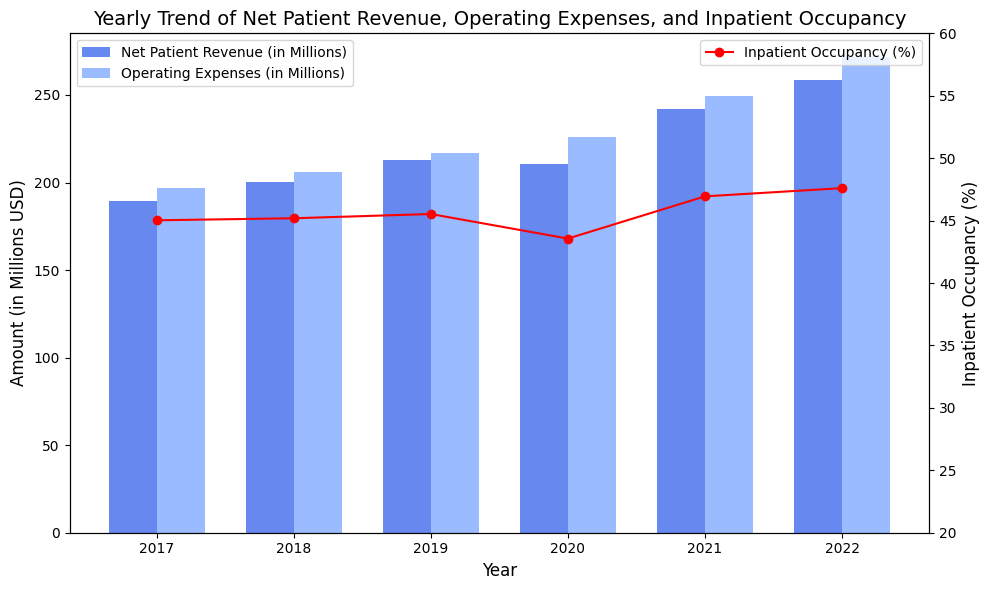

In [ ]:
# Ensure 'Inpatient Occupancy' is numeric
NASHP['Inpatient Occupancy'] = pd.to_numeric(NASHP['Inpatient Occupancy'], errors='coerce')
NASHP['Net Patient Revenue'] = pd.to_numeric(NASHP['Net Patient Revenue'], errors='coerce')
NASHP['Operating Expenses'] = pd.to_numeric(NASHP['Operating Expenses'], errors='coerce')

# Group the data by 'Year' and calculate the mean for each group
yearly_grouped = NASHP.groupby('Year')[['Net Patient Revenue', 'Operating Expenses', 'Inpatient Occupancy']].mean().reset_index()

# Visualization: Create a plot with two y-axes
sns.set_palette(sns.color_palette("coolwarm"))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: Net Patient Revenue and Operating Expenses (bar chart)
bar_width = 0.35
index = np.arange(len(yearly_grouped['Year']))

ax1.bar(index, yearly_grouped['Net Patient Revenue'] / 1e6, bar_width, label='Net Patient Revenue (in Millions)')
ax1.bar(index + bar_width, yearly_grouped['Operating Expenses'] / 1e6, bar_width, label='Operating Expenses (in Millions)')

# Set the left y-axis label
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Amount (in Millions USD)', fontsize=12)

# Set the x-axis with the years
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(yearly_grouped['Year'].astype(int))  # Convert the years to integers for display

# Right y-axis: Inpatient Occupancy (line chart, converted to percentage)
ax2 = ax1.twinx()
ax2.plot(index + bar_width / 2, yearly_grouped['Inpatient Occupancy'] * 100, color='r', marker='o', label='Inpatient Occupancy (%)')

# Set the right y-axis label
ax2.set_ylabel('Inpatient Occupancy (%)', fontsize=12)
ax2.set_ylim(20, 60)

# Add a title
plt.title('Yearly Trend of Net Patient Revenue, Operating Expenses, and Inpatient Occupancy', fontsize=14)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Turn off the grid lines
ax1.grid(False)  # Turn off grid for the left y-axis
ax2.grid(False)  # Turn off grid for the right y-axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The graph demonstrates trends in net patient revenue, operating expenses, and inpatient occupancy from 2017 to 2022. During 2020, when COVID-19 was at its peak, inpatient occupancy dropped but rebounded afterward. Despite the pandemic, both net patient revenue and operating expenses steadily increased, reflecting the financial and operational pressures hospitals faced.

### 2.How Does COVID-19 Severity Relate to Population Size at the State Level?


<ipython-input-16-c9b269916c7d>:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Total COVID-19 Cases (Weekly Average)', orientation='vertical')


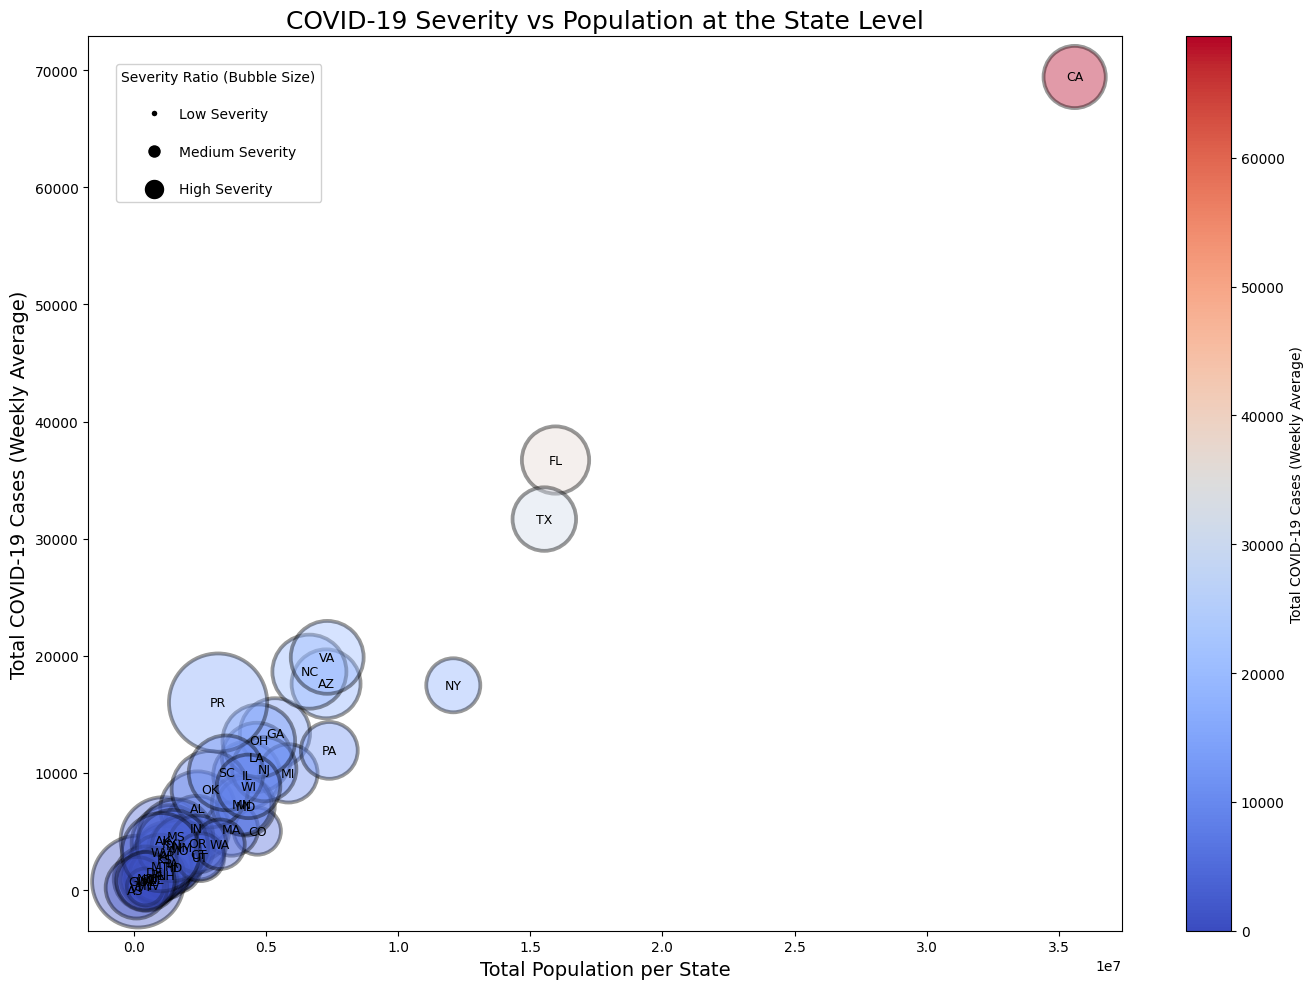

In [ ]:
USCOVID_unique = USCOVID.drop_duplicates(subset='county')

state_population = USCOVID_unique.groupby('state')['county_population'].sum().reset_index()

state_covid_severity = USCOVID_unique.groupby('state')['covid_cases_per_100k'].mean().reset_index()

state_covid_severity['total_cases'] = state_covid_severity['covid_cases_per_100k'] * state_population['county_population'] / 100000

state_data = pd.merge(state_population, state_covid_severity[['state', 'total_cases']], on='state')

state_data['severity_ratio'] = state_data['total_cases'] / state_data['county_population']

# Create scatter plot and adjust bubble size for clearer differences
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x='county_population',
    y='total_cases',
    data=state_data,
    hue='total_cases',
    size='severity_ratio',
    sizes=(100, 5000),
    palette='coolwarm',
    alpha=0.4,
    edgecolor='black'
)

# Set chart title and axis labels
plt.title('COVID-19 Severity vs Population at the State Level', fontsize=18)
plt.xlabel('Total Population per State', fontsize=14)
plt.ylabel('Total COVID-19 Cases (Weekly Average)', fontsize=14)

# Add state names as labels for each point
for i in range(state_data.shape[0]):
    plt.text(
        state_data['county_population'].iloc[i],
        state_data['total_cases'].iloc[i],
        state_data['state'].iloc[i],
        fontsize=9,
        ha='center',
        va='center'
    )

# Add color bar as a legend to represent total infection cases over two years
norm = plt.Normalize(state_data['total_cases'].min(), state_data['total_cases'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Remove the right-side axis and add color bar as the main axis on the right side
cbar = plt.colorbar(sm, label='Total COVID-19 Cases (Weekly Average)', orientation='vertical')

# Manually create bubble size legend with the same color but different sizes to represent severity ratio
size_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5, label='Low Severity'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Medium Severity'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=15, label='High Severity')
]

plt.legend(
    handles=size_handles,
    title='Severity Ratio (Bubble Size)',
    loc='upper left',  # Move the legend to the top left corner
    bbox_to_anchor=(0, 1),
    borderaxespad=2,
    labelspacing=1.7,
    frameon=True,
    framealpha=0.9
)

# Adjust the layout
plt.tight_layout()
plt.show()


In the bubble plot, states with fewer total cases are represented by bluer bubbles, while states with higher total cases are colored redder. And the more severe the COVID situation, the larger the bubble is for different states. Most states are clustered in the lower-left corner, indicating relatively small populations and similar total case counts, with little variation in the number of cases or severity.

California (CA) stands out as an exception, having the highest total case count, indicated by the reddest bubble. However, because California has a very large population, its bubble size remains relatively small compared to its case count, reflecting a moderate severity ratio (cases/population) despite the large absolute number of infections.

###  3.How does the distribution of Provider Relief Fund correlate with COVID-19 case levels across states?

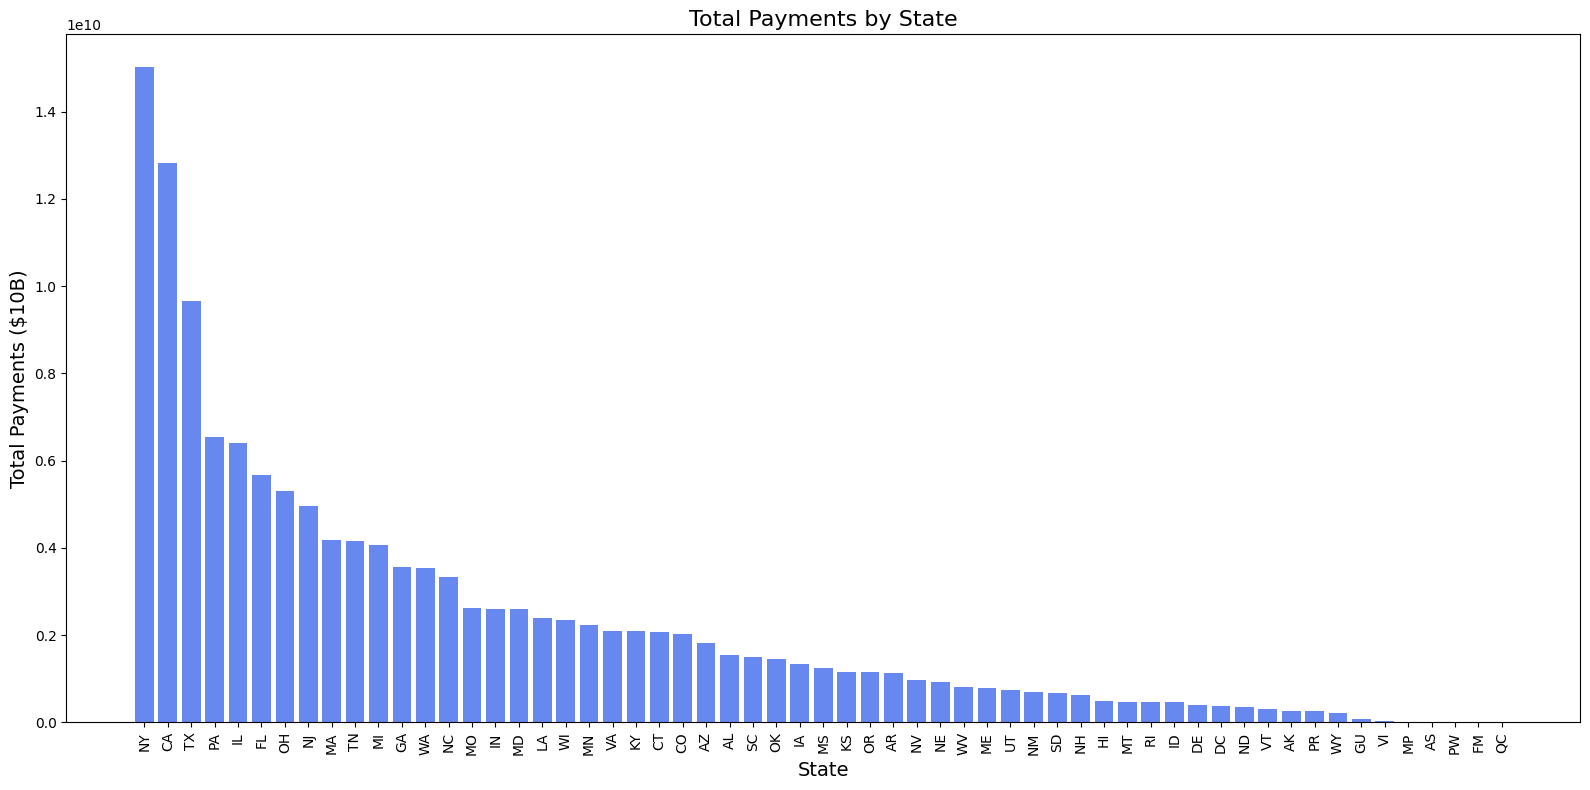

,Payment
State,
NY,15019455621
CA,12810460939
TX,9652564998
PA,6549286355
IL,6395478528


In [ ]:
HHS['Payment'] = HHS['Payment'].replace({'\$': '', ',': ''}, regex=True).astype(int)

groupby_state = HHS.groupby('State')
total_payments_by_state = groupby_state['Payment'].sum()
decending_order_state = total_payments_by_state.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a bar plot with all bars in navy color
bars = plt.bar(decending_order_state.index, decending_order_state.values)
sns.set_palette(sns.color_palette("coolwarm"))

plt.title('Total Payments by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Payments ($10B)', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

decending_order_state.head()



The bar chart shows Total Provider Relief Fund (PRF) payments distributed by state, with New York (NY), California (CA), and Texas (TX) receiving the largest shares. These states, which received the highest payments, also experienced some of the highest numbers of COVID-19 cases, indicating a likely correlation between the amount of relief funding and the severity of the pandemic in each state. The payments drop off significantly after the top states, suggesting a proportional response where states with higher COVID-19 burdens received more financial support.

###  4.How do different types of hospitals differ in operating costs during the COVID-19 pandemic?

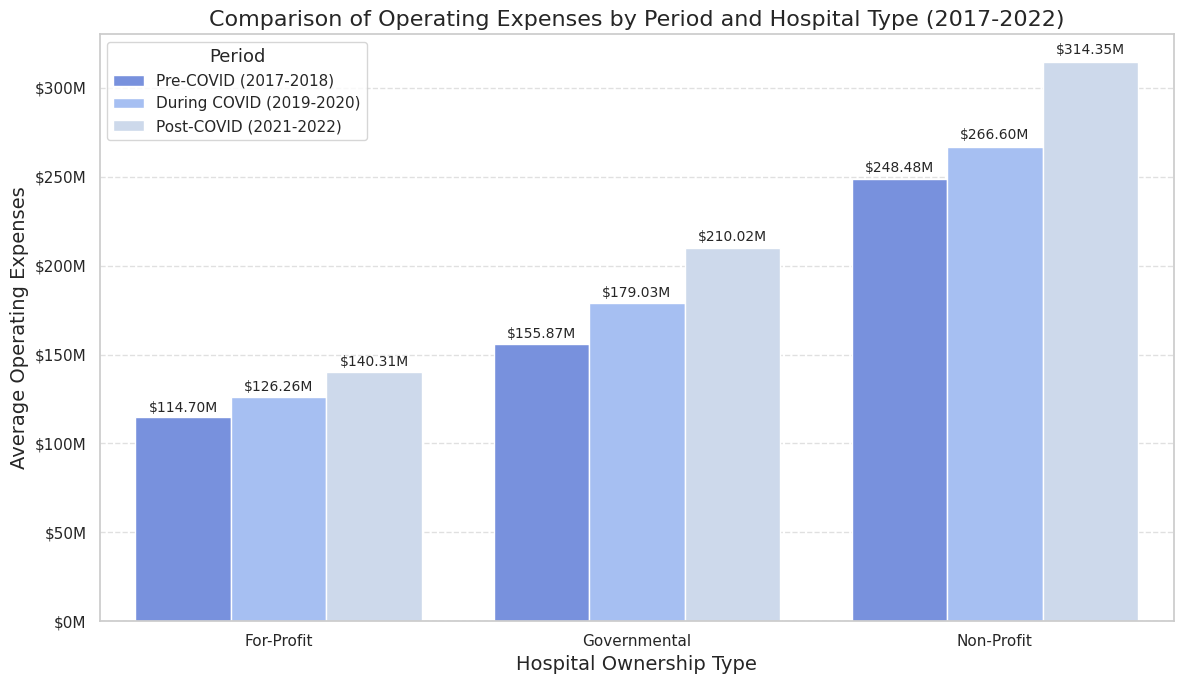

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Convert 'Operating Expenses' column to numeric, forcing any invalid parsing to NaN
NASHP['Operating Expenses'] = pd.to_numeric(NASHP['Operating Expenses'], errors='coerce')

# Create a new column 'Period' to categorize the years into 'Pre-COVID', 'During COVID', and 'Post-COVID'
NASHP['Period'] = pd.cut(NASHP['Year'],
                         bins=[2016, 2018, 2020, 2022],
                         labels=['Pre-COVID (2017-2018)', 'During COVID (2019-2020)', 'Post-COVID (2021-2022)'])

# Filter the data for the relevant periods
covid_period_data = NASHP[NASHP['Period'].notna()]

# Group by both 'Period' and 'Hospital Ownership Type' and calculate the mean, using observed=False to avoid the warning
grouped_operating_costs = covid_period_data.groupby(
    ['Period', 'Hospital Ownership Type'], observed=False)['Operating Expenses'].mean().reset_index()

# Create a figure and adjust size
plt.figure(figsize=(12, 7))

# Using the 'pastel' palette for a softer color scheme
sns.barplot(x='Hospital Ownership Type', y='Operating Expenses', hue='Period', data=grouped_operating_costs,
           palette=sns.set_palette("coolwarm"), dodge=True)

# Adding labels and title with increased font sizes
plt.title('Comparison of Operating Expenses by Period and Hospital Type (2017-2022)', fontsize=16)
plt.xlabel('Hospital Ownership Type', fontsize=14)
plt.ylabel('Average Operating Expenses', fontsize=14)

# Format the Y-axis to show values in millions
def millions(x, pos):
    return f'${x*1e-6:,.0f}M'

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add data labels on top of the bars, skipping zeros or NaN values
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Skip bars with zero height
        plt.gca().text(p.get_x() + p.get_width()/2, height + 0.01*height,
                       f'${height*1e-6:,.2f}M', ha="center", va='bottom', fontsize=10)

# Adjust legend position and styling
plt.legend(title='Period', title_fontsize='13', fontsize='11', loc='upper left')

# Final adjustments to layout
plt.tight_layout()

# Show the plot
plt.show()

This bar chart visualizes the comparison of average operating expenses for different types of hospitals (For-Profit, Governmental, and Non-Profit) over the COVID-19 period (2017-2022). The data is grouped by both hospital ownership type and year to show how operating expenses have varied across these five years.The chart shows that Non-Profit hospitals consistently had the highest operating expenses during the COVID-19 period, reflecting their larger scale of operations. Governmental hospitals also had high but more variable costs, while For-Profit hospitals had the lowest expenses, indicating a more cost-efficient or narrower operational focus during the pandemic.








### 5.What is the Correlation with Net Income and Other Variables?

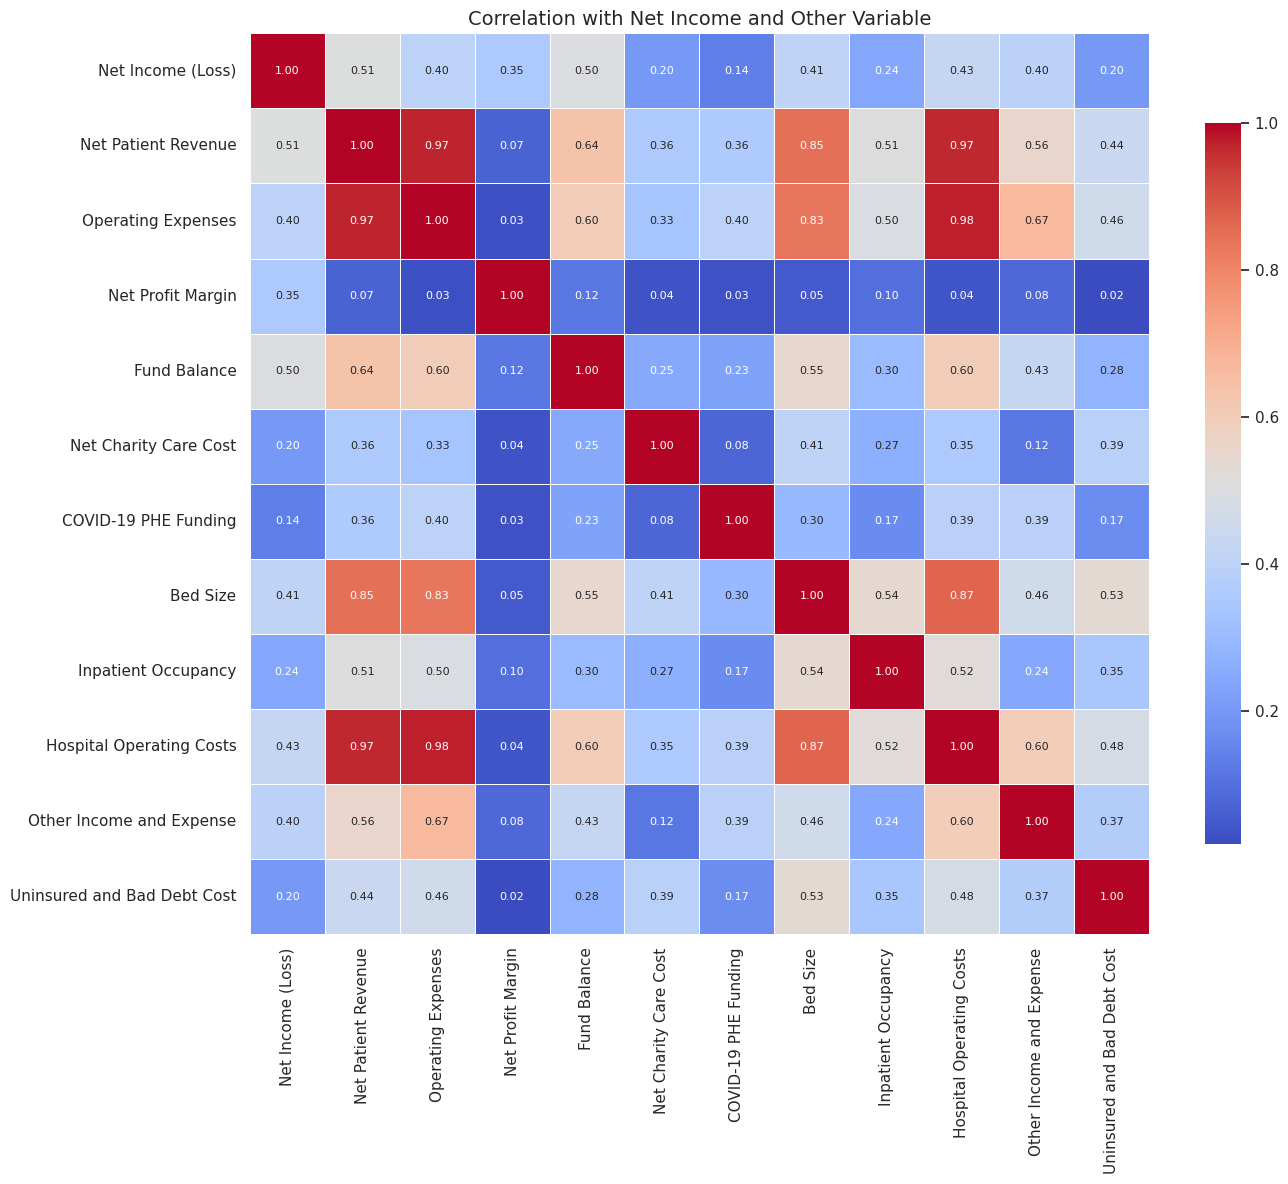

In [ ]:
# Convert 'Bed Size' and 'Inpatient Occupancy' to numeric, forcing errors to NaN
NASHP['Bed Size'] = pd.to_numeric(NASHP['Bed Size'], errors='coerce')
NASHP['Inpatient Occupancy'] = pd.to_numeric(NASHP['Inpatient Occupancy'], errors='coerce')

# Define relevant numeric columns for correlation, now including 'Bed Size' and 'Inpatient Occupancy'
numeric_columns = ['Net Income (Loss)', 'Net Patient Revenue', 'Operating Expenses', 'Net Profit Margin',
                   'Fund Balance', 'Net Charity Care Cost', 'COVID-19 PHE Funding',
                   'Bed Size', 'Inpatient Occupancy',
                   'Hospital Operating Costs', 'Other Income and Expense', 'Uninsured and Bad Debt Cost']

# Convert columns to numeric, forcing invalid parsing to NaN
for col in numeric_columns:
    NASHP[col] = pd.to_numeric(NASHP[col], errors='coerce')

# Drop rows with NaN values for the relevant columns
NASHP_cleaned = NASHP.dropna(subset=numeric_columns)

# Compute the correlation matrix
correlation_matrix = NASHP_cleaned[numeric_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})

# Add title
plt.title('Correlation with Net Income and Other Variable', fontsize=14)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



This heatmap shows the correlation between Net Income (Loss) and various other variables. Net Income (Loss) has a moderate positive correlation with Net Patient Revenue (0.46) and Operating Expenses (0.39). Bed Size shows a strong correlation with Net Patient Revenue (0.88) and Operating Expenses (0.86). COVID-19 PHE Funding has a moderate correlation with Operating Expenses (0.62). Overall, the heatmap reveals significant relationships between key financial indicators.

## B. Summary for Basic Exploratory


After conducting an initial exploration of the dataset using functions like head(), info(), and describe(), we created five basic visualizations to better understand the data, the severity of COVID-19 across the United States, and the funding hospitals received during the pandemic. These early analyses serve as a foundation for more detailed exploration and allow us to identify potential areas for deeper investigation.



# IV. Detailed Analysis


## **A. Funded vs Non-Funded Hospital Comparison**

###  1.Comparison of Financial Metrics for Funded vs Non-Funded Hospitals (2020-2021)

In this analysis, we aimed to assess whether COVID-19 funding positively impacted hospital financial metrics. First, we replaced non-numeric and missing values in key financial columns with zeros or column means. Then, we filtered hospitals that had data for both 2020 and 2021, identifying those that received funding in both years (funded hospitals) and those that did not (non-funded hospitals). We added a "Funding Status" column and grouped the data by year and funding status to calculate the average values for key metrics such as net patient revenue, operating expenses, and net income. We specifically chose 2020 and 2021 because 2020 marked the peak of the pandemic, and we wanted to analyze how hospitals recovered in 2021. We calculated the percentage change in these metrics from 2020 to 2021 to evaluate recovery rates. Finally, visualizations were generated to compare the financial performance of funded and non-funded hospitals. The analysis helps show that funded hospitals exhibited more significant recovery in key financial metrics compared to non-funded hospitals.

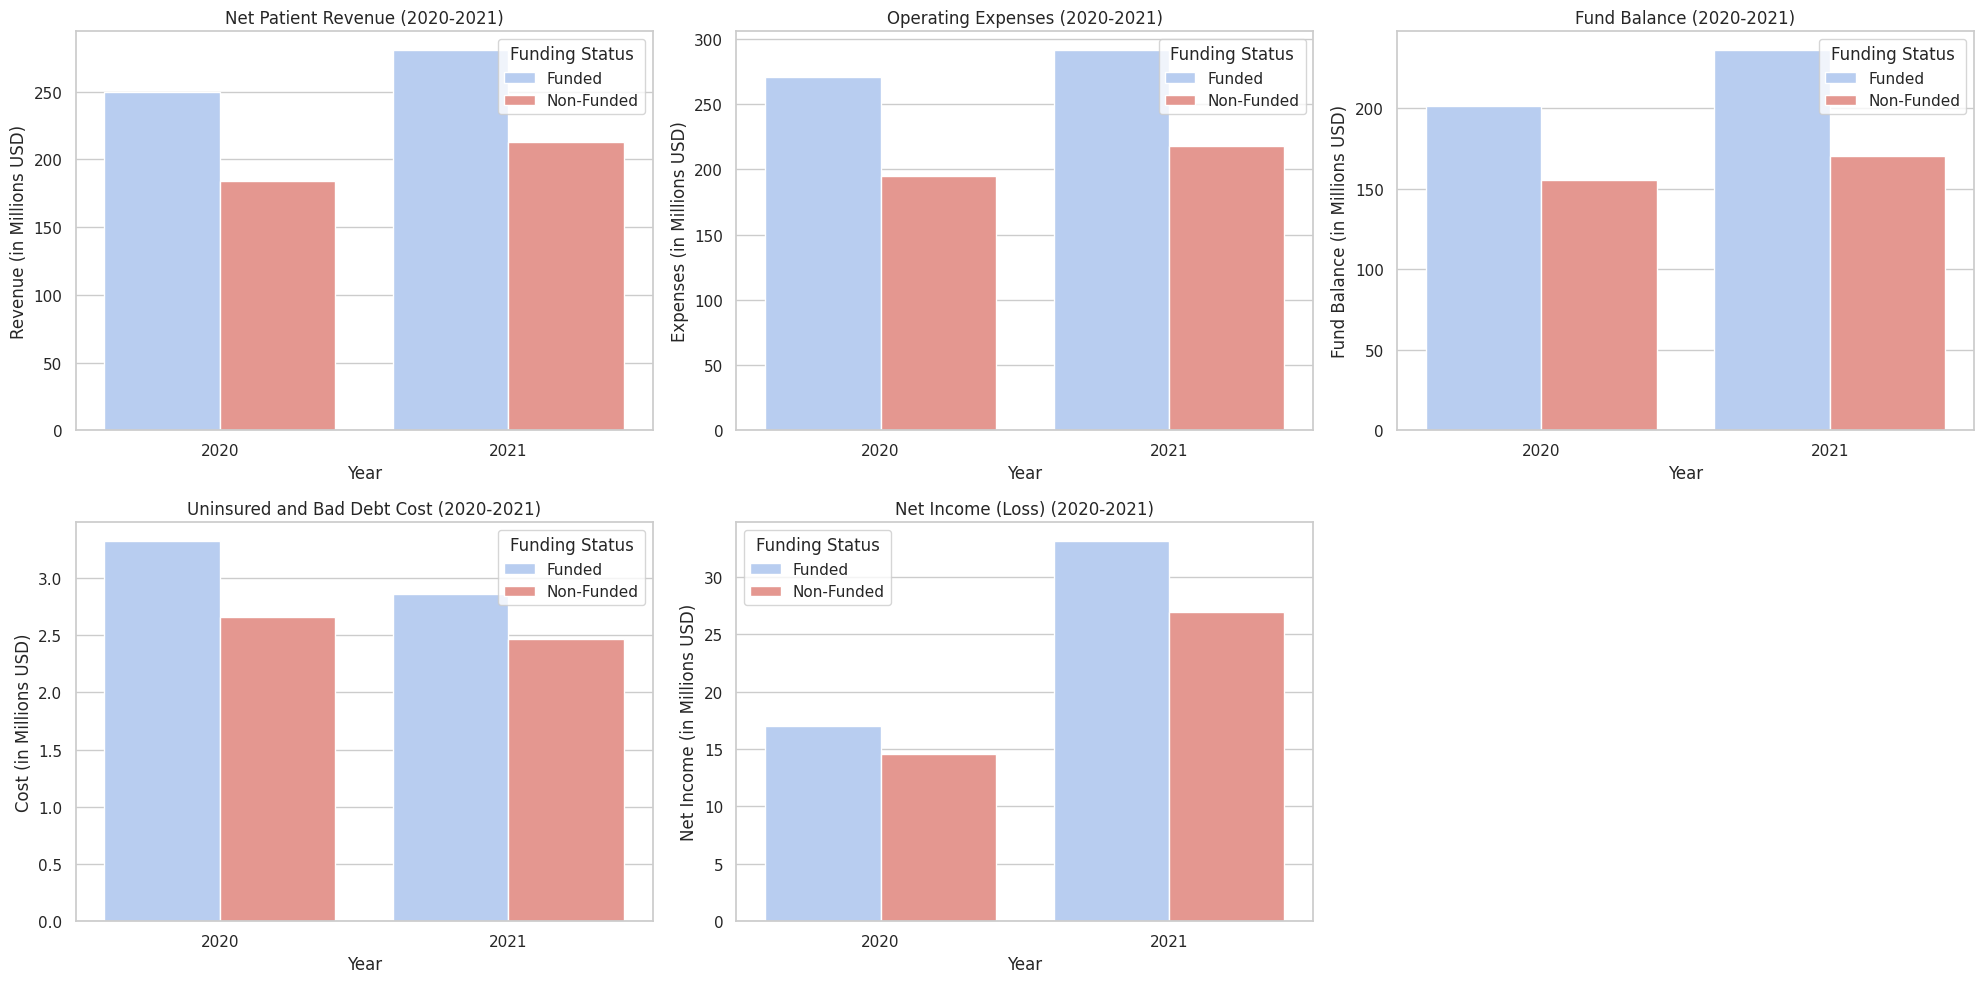

In [ ]:
# Replace non-numeric and missing values in relevant columns
NASHP['COVID-19 PHE Funding'] = pd.to_numeric(NASHP['COVID-19 PHE Funding'], errors='coerce').fillna(0)
columns_to_convert = ['Net Patient Revenue', 'Operating Expenses', 'Fund Balance', 'Uninsured and Bad Debt Cost', 'Net Income (Loss)', 'Net Profit Margin', 'Net Charity Care Cost', 'Bed Size', 'Inpatient Occupancy', 'Hospital Operating Costs', 'Other Income and Expense']
for col in columns_to_convert:
    NASHP[col] = pd.to_numeric(NASHP[col], errors='coerce').fillna(NASHP[col].mean())

# Filter hospitals that have data for the years 2020 and 2021
hospitals_2021 = set(NASHP[NASHP['Year'] == 2021]['Hospital Name'])
hospitals_2020 = set(NASHP[NASHP['Year'] == 2020]['Hospital Name'])
common_hospitals = hospitals_2020.intersection(hospitals_2021)
filtered_df = NASHP[NASHP['Hospital Name'].isin(common_hospitals) & (NASHP['Year'].isin([2020, 2021]))]

# Separate funded and non-funded hospitals
# Funded: Hospitals with funding in both 2020 and 2021
funded_hospitals = filtered_df.groupby('Hospital Name').filter(lambda x: (x['COVID-19 PHE Funding'] > 0).all())

# Non-Funded: Hospitals with no funding in both 2020 and 2021
non_funded_hospitals = filtered_df.groupby('Hospital Name').filter(lambda x: (x['COVID-19 PHE Funding'] == 0).all())

# Add Funding Status column
filtered_df = filtered_df.merge(funded_hospitals[['Hospital Name']].drop_duplicates(), on='Hospital Name', how='left', indicator='Funding Status')
filtered_df['Funding Status'] = filtered_df['Funding Status'].apply(lambda x: 'Funded' if x == 'both' else 'Non-Funded')

# Group by year and funding status to calculate average metrics
metrics_comparison = filtered_df.groupby(['Year', 'Funding Status'])[['Net Patient Revenue', 'Operating Expenses', 'Fund Balance', 'Uninsured and Bad Debt Cost', 'Net Income (Loss)']].mean().reset_index()


# Convert values to millions
metrics_comparison[['Net Patient Revenue', 'Operating Expenses', 'Fund Balance', 'Uninsured and Bad Debt Cost', 'Net Income (Loss)']] /= 1e6

# Plot the comparison for funded vs non-funded hospitals in 2020 and 2021
plt.figure(figsize=(20, 10))

# Custom palette: blue for funded, red for non-funded
custom_palette = {'Funded': '#AECBFA', 'Non-Funded': '#F28B82'}

# Plot metrics
plt.subplot(2, 3, 1)
sns.barplot(data=metrics_comparison, x='Year', y='Net Patient Revenue', hue='Funding Status', palette=custom_palette)
plt.title('Net Patient Revenue (2020-2021)')
plt.ylabel('Revenue (in Millions USD)')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
sns.barplot(data=metrics_comparison, x='Year', y='Operating Expenses', hue='Funding Status', palette=custom_palette)
plt.title('Operating Expenses (2020-2021)')
plt.ylabel('Expenses (in Millions USD)')
plt.xlabel('Year')

plt.subplot(2, 3, 3)
sns.barplot(data=metrics_comparison, x='Year', y='Fund Balance', hue='Funding Status', palette=custom_palette)
plt.title('Fund Balance (2020-2021)')
plt.ylabel('Fund Balance (in Millions USD)')
plt.xlabel('Year')

plt.subplot(2, 3, 4)
sns.barplot(data=metrics_comparison, x='Year', y='Uninsured and Bad Debt Cost', hue='Funding Status', palette=custom_palette)
plt.title('Uninsured and Bad Debt Cost (2020-2021)')
plt.ylabel('Cost (in Millions USD)')
plt.xlabel('Year')

plt.subplot(2, 3, 5)
sns.barplot(data=metrics_comparison, x='Year', y='Net Income (Loss)', hue='Funding Status', palette=custom_palette)
plt.title('Net Income (Loss) (2020-2021)')
plt.ylabel('Net Income (in Millions USD)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


After filtering the data, there were 2,054 funded hospitals and 792 non-funded hospitals. The visualizations show a comparison of financial metrics between these groups for 2020 and 2021. Funded hospitals consistently exhibit higher net patient revenue, operating expenses, fund balance, and net income (loss) compared to non-funded hospitals across both years. Notably, funded hospitals demonstrated a more significant recovery in 2021, particularly in net income. Meanwhile, non-funded hospitals experienced slower recovery, highlighting the positive impact of COVID-19 funding on hospital financial recovery.

### 2.Assessing the Impact of COVID-19 Funding on Hospital Financial Recovery

Recovery Calculation:

$$
\text{Recovery Rate (\%)} = \frac{\text{Metric in 2021} - \text{Metric in 2020}}{\text{Metric in 2020}} \times 100
$$

This method allows us to evaluate the growth or decline in key financial metrics over time.


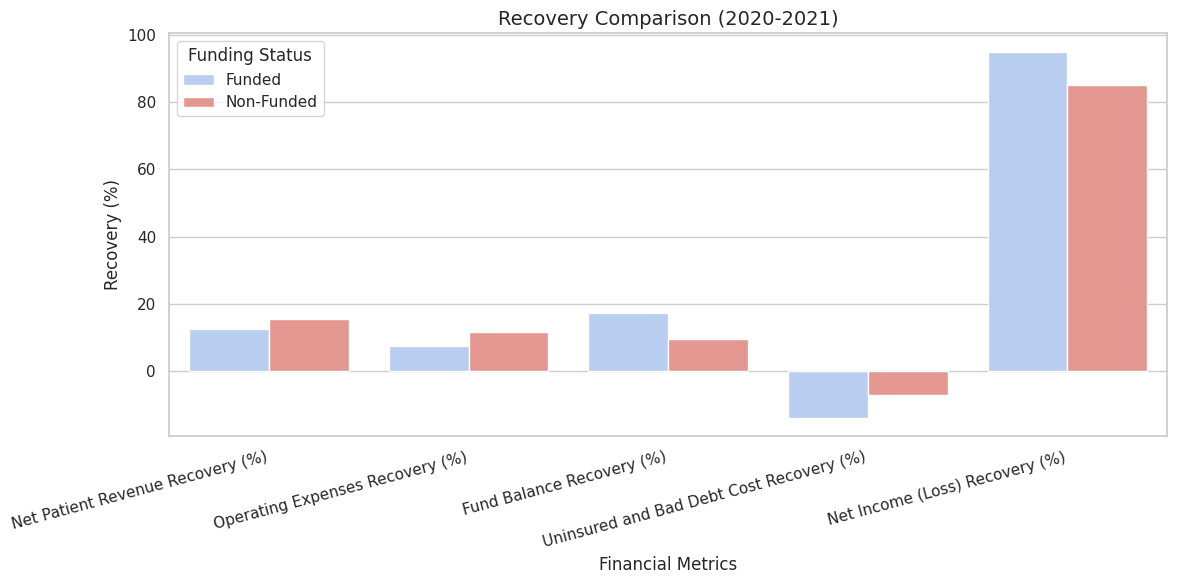

In [ ]:
# Calculate Recovery Metrics (Percentage Change from 2020 to 2021)
recovery_metrics = metrics_comparison.pivot(index='Funding Status', columns='Year', values=['Net Patient Revenue', 'Operating Expenses', 'Fund Balance', 'Uninsured and Bad Debt Cost', 'Net Income (Loss)']).dropna(axis=1)
recovery_metrics_change = ((recovery_metrics.xs(2021, level=1, axis=1) - recovery_metrics.xs(2020, level=1, axis=1)) / recovery_metrics.xs(2020, level=1, axis=1)) * 100
recovery_metrics_change.columns = [f'{col} Recovery (%)' for col in recovery_metrics_change.columns]
recovery_metrics_change.reset_index(inplace=True)

# Plot with Coolwarm Palette and Better Readability
plt.figure(figsize=(12, 6))  # Adjusting figure size for better readability
recovery_metrics_melted = recovery_metrics_change.melt(id_vars='Funding Status', var_name='Metric', value_name='Recovery (%)')

# Apply the custom pastel palette for funded and non-funded
custom_palette = {'Funded': '#AECBFA', 'Non-Funded': '#F28B82'}

# Create the bar plot with custom palette
sns.barplot(data=recovery_metrics_melted, x='Metric', y='Recovery (%)', hue='Funding Status', palette=custom_palette)

# Improve label readability by rotating them slightly
plt.title('Recovery Comparison (2020-2021)', fontsize=14)
plt.ylabel('Recovery (%)', fontsize=12)
plt.xlabel('Financial Metrics', fontsize=12)
plt.xticks(rotation=15, ha='right')  # Slight rotation for better readability

plt.tight_layout()  # Ensure the layout is adjusted to avoid overlap
plt.show()



Upon analyzing the graph, it's noticeable that non-funded hospitals exhibit higher recovery rates in certain financial metrics. Specifically, Net Patient Revenue Recovery (%), Operating Expenses Recovery (%) show better performance for non-funded hospitals. This suggests that these hospitals may have been more efficient in managing resources or controlling costs despite the lack of external funding.

However, in terms of Fund Balance Recovery (%) and Net Income (Loss) Recovery (%), funded hospitals demonstrate significantly higher recovery rates. Especially for net income recovery, funded hospitals experienced a much faster and more stable financial recovery, highlighting the positive impact of COVID-19 PHE funding on overall financial performance.

When interpreting the Uninsured and Bad Debt Cost Recovery (%), it is crucial to note that a higher recovery rate indicates worsening financial performance, as higher bad debt costs are generally unfavorable. Therefore, while non-funded hospitals show higher recovery in bad debt costs, it actually reflects a negative trend in financial health, meaning that they were less efficient in reducing uncollectible payments compared to funded hospitals.


### 3.Correlation between Net Income (Loss) and other variables for funded and non-funded hospitals.

Correlation analysis helps us understand the relationships between key financial metrics within hospitals. In this heatmap, funded and non-funded hospitals are compared to observe how various factors (e.g., Net Income, Operating Expenses, Fund Balance) correlate with each other.

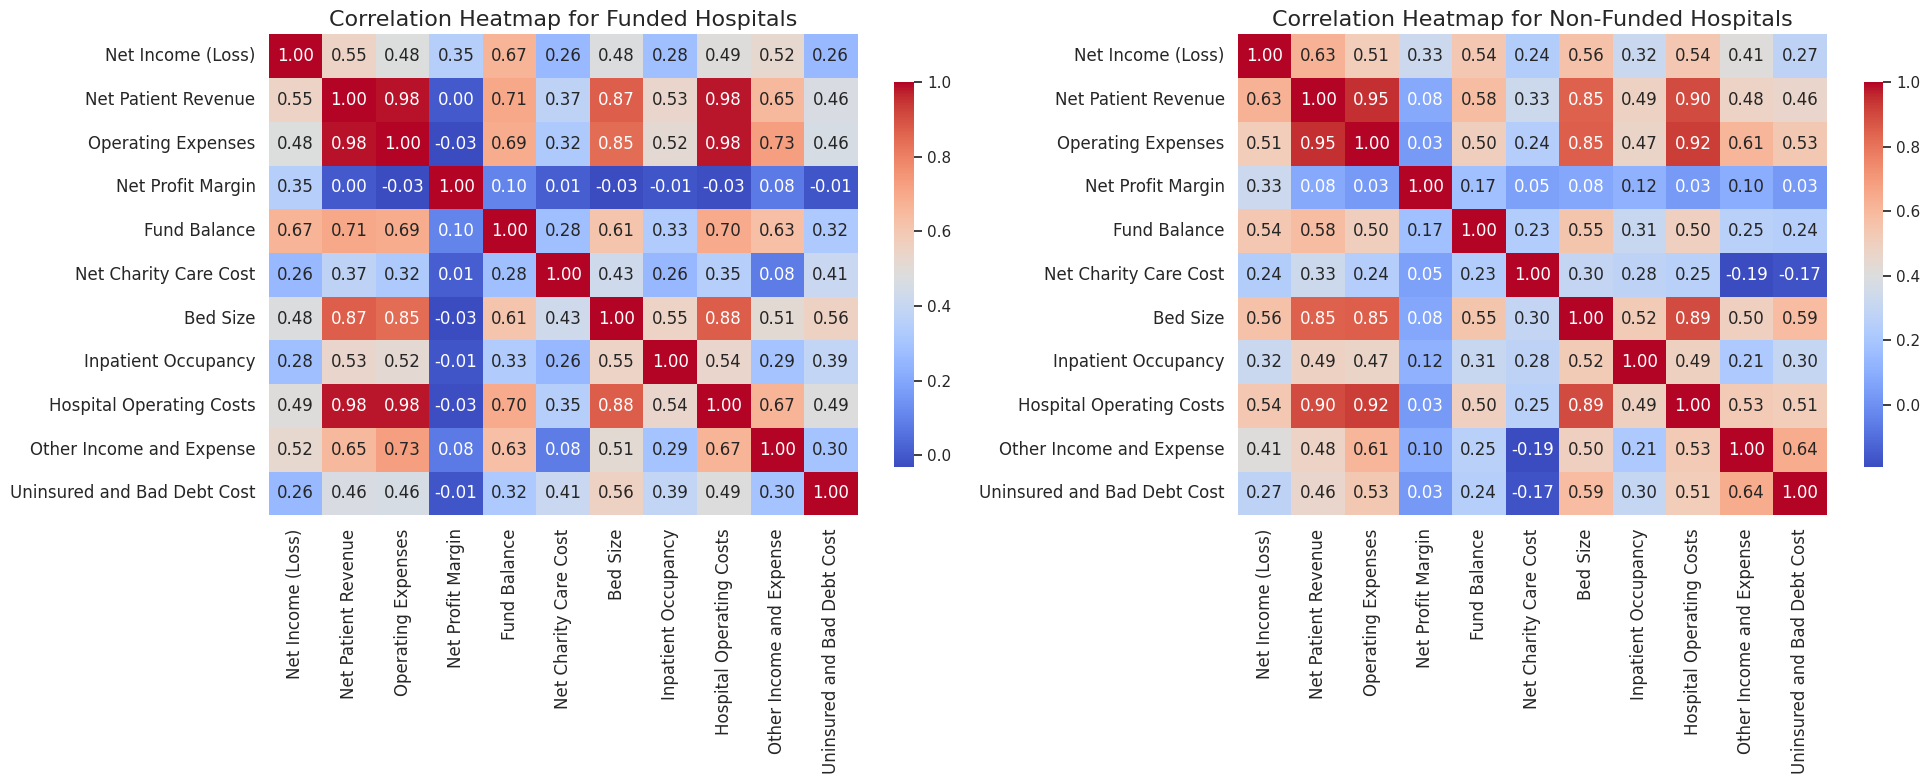

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Replace non-numeric and missing values in relevant columns
NASHP['COVID-19 PHE Funding'] = pd.to_numeric(NASHP['COVID-19 PHE Funding'], errors='coerce').fillna(0)
columns_to_convert = ['Net Patient Revenue', 'Operating Expenses', 'Fund Balance', 'Uninsured and Bad Debt Cost', 'Net Income (Loss)', 'Net Profit Margin', 'Net Charity Care Cost', 'Bed Size', 'Inpatient Occupancy', 'Hospital Operating Costs', 'Other Income and Expense']
for col in columns_to_convert:
    NASHP[col] = pd.to_numeric(NASHP[col], errors='coerce').fillna(NASHP[col].mean())

# Step 2: Filter hospitals that have data for the years 2020 and 2021
hospitals_2021 = set(NASHP[NASHP['Year'] == 2021]['Hospital Name'])
hospitals_2020 = set(NASHP[NASHP['Year'] == 2020]['Hospital Name'])
common_hospitals = hospitals_2020.intersection(hospitals_2021)
filtered_df = NASHP[NASHP['Hospital Name'].isin(common_hospitals) & (NASHP['Year'].isin([2020, 2021]))]

# Step 3: Separate funded and non-funded hospitals
# Funded: Hospitals with funding in both 2020 and 2021
funded_hospitals = filtered_df.groupby('Hospital Name').filter(lambda x: (x['COVID-19 PHE Funding'] > 0).all())

# Non-Funded: Hospitals with no funding in both 2020 and 2021
non_funded_hospitals = filtered_df.groupby('Hospital Name').filter(lambda x: (x['COVID-19 PHE Funding'] == 0).all())

# Step 8: Create heatmaps for correlation analysis between funded and non-funded hospitals
# Define columns of interest for correlation
columns_of_interest =['Net Income (Loss)', 'Net Patient Revenue', 'Operating Expenses', 'Net Profit Margin',
                   'Fund Balance', 'Net Charity Care Cost', 'Bed Size', 'Inpatient Occupancy',
                   'Hospital Operating Costs', 'Other Income and Expense', 'Uninsured and Bad Debt Cost']
# Create subplots for two heatmaps in one row
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.set_palette('pastel')

# Heatmap for Funded Hospitals
sns.heatmap(funded_hospitals[columns_of_interest].corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax[0], cbar_kws={'shrink': 0.8})
ax[0].set_title("Correlation Heatmap for Funded Hospitals", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Heatmap for Non-Funded Hospitals
sns.heatmap(non_funded_hospitals[columns_of_interest].corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax[1], cbar_kws={'shrink': 0.8})
ax[1].set_title("Correlation Heatmap for Non-Funded Hospitals", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

According to the heatmap, Net Patient Revenue and Hospital Operating Costs show strong positive correlations with Net Income (Loss) for both funded and non-funded hospitals. In the case of funded hospitals, Net Patient Revenue has a correlation of 0.55 and Hospital Operating Costs has a correlation of 0.49 with Net Income, indicating that these variables are closely tied to hospital financial performance. Similarly, in non-funded hospitals, Net Patient Revenue has a correlation of 0.63, and Hospital Operating Costs have a correlation of 0.54, suggesting these are significant factors in determining financial outcomes. However, these correlations only show relationships between variables, not a direct causal effect of funding on improved financial outcomes, so we use linear regression models for more detailed analysis. These strong correlations make them ideal candidates for linear regression to explore how they affect net income.

### 4.Linear regression of Hospital Operating Costs and Net Income for funded and non-funded hospitals.

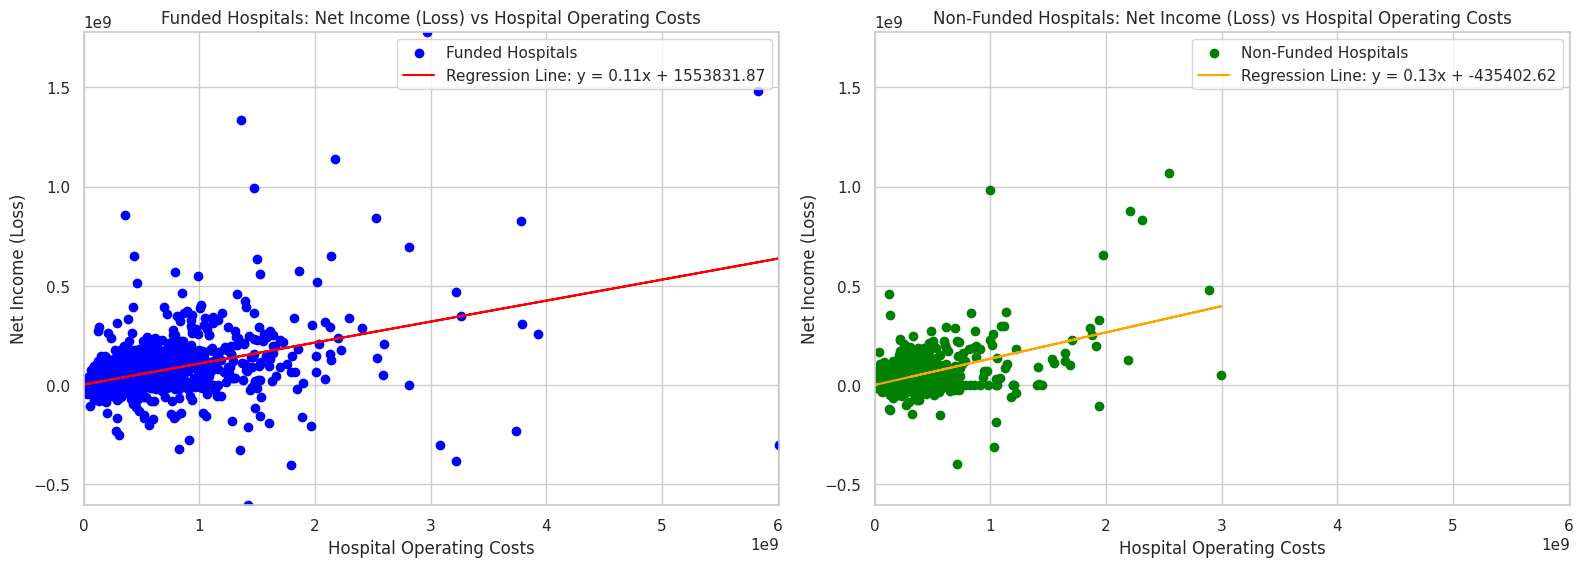

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# For funded hospitals, using 'Fund Balance' as the income measure
X_funded = funded_hospitals['Hospital Operating Costs'].values.reshape(-1, 1)
y_funded = funded_hospitals['Net Income (Loss)'].values.reshape(-1, 1)
reg_funded = LinearRegression().fit(X_funded, y_funded)
y_pred_funded = reg_funded.predict(X_funded)

# For non-funded hospitals (if applicable, adjust as needed)
X_non_funded = non_funded_hospitals['Hospital Operating Costs'].values.reshape(-1, 1)
y_non_funded = non_funded_hospitals['Net Income (Loss)'].values.reshape(-1, 1)
reg_non_funded = LinearRegression().fit(X_non_funded, y_non_funded)
y_pred_non_funded = reg_non_funded.predict(X_non_funded)

# Retrieve regression coefficients (slope and intercept) for both groups
funded_slope = reg_funded.coef_[0][0]
funded_intercept = reg_funded.intercept_[0]

non_funded_slope = reg_non_funded.coef_[0][0]
non_funded_intercept = reg_non_funded.intercept_[0]

# Set common axis limits
x_min = min(X_funded.min(), X_non_funded.min())
x_max = max(X_funded.max(), X_non_funded.max())
y_min = min(y_funded.min(), y_non_funded.min())
y_max = max(y_funded.max(), y_non_funded.max())

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for funded hospitals
ax[0].scatter(X_funded, y_funded, color='blue', label='Funded Hospitals')
ax[0].plot(X_funded, y_pred_funded, color='red', label=f'Regression Line: y = {funded_slope:.2f}x + {funded_intercept:.2f}')
ax[0].set_title('Funded Hospitals: Net Income (Loss) vs Hospital Operating Costs')
ax[0].set_xlabel('Hospital Operating Costs')
ax[0].set_ylabel('Net Income (Loss)')
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].legend()
ax[0].grid(True)

# Plot for non-funded hospitals
ax[1].scatter(X_non_funded, y_non_funded, color='green', label='Non-Funded Hospitals')
ax[1].plot(X_non_funded, y_pred_non_funded, color='orange', label=f'Regression Line: y = {non_funded_slope:.2f}x + {non_funded_intercept:.2f}')
ax[1].set_title('Non-Funded Hospitals: Net Income (Loss) vs Hospital Operating Costs')
ax[1].set_xlabel('Hospital Operating Costs')
ax[1].set_ylabel('Net Income (Loss)')
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In the graphs, we observe the relationship between Hospital Operating Costs and Net Income. For funded hospitals, the regression line indicates that for every additional billion dollars spent on Hospital Operating Costs, the Net Income increases by 0.11 billion dollars. The positive intercept suggests that funded hospitals start from a positive financial position. In contrast, for non-funded hospitals, the regression line shows a steeper increase, with Net Income rising by 0.13 billion dollars for each additional billion dollars spent on operating expenses, and the negative intercept indicates that these hospitals start from deficit condition. To see whether funded hospital or non-funded hospital got higher Net Income, we should find the mean and threshold and then compare them.

In [ ]:
mean_cost = filtered_df['Hospital Operating Costs'].mean()
mean_cost

195636594.82277048

In [ ]:
# find the threshold
from sympy import symbols, Eq, solve

# Define the variable and equations
x = symbols('x')
eq1 = Eq(0.11 * x + 1553831.87, 0.13 * x - 435402.62)

# Solve the equation
solution = solve(eq1, x)
solution

[99461724.5000000]

When Hospital Operating Costs are exactly equal to the threshold of 99,461,724.5 USD, funded and non-funded hospitals will have the exact same Net Income. When operating costs are below the threshold, funded hospitals will have a higher net income than non-funded hospitals. However, when operating costs exceed the threshold, non-funded hospitals will achieve a higher net income. In this case, the mean operating cost is 195,636,594.82 USD, which is much higher than the threshold, indicating that non-funded hospitals will generate more net income than funded hospitals.

At lower operating costs, funded hospitals benefit from a higher intercept (initial financial position), which gives them a financial advantage. However, as operating costs increase, their net income grows more slowly. This could be because funded hospitals can rely on external funding, giving them less incentive to cut costs. Alternatively, it might be due to diminishing returns—as operating costs rise beyond a certain point, the additional benefit provided by the funding diminishes, leading to slower net income growth for funded hospitals.

### 5.Linear regression of Net Patient Revenue and Net Income for funded and non-funded hospitals.

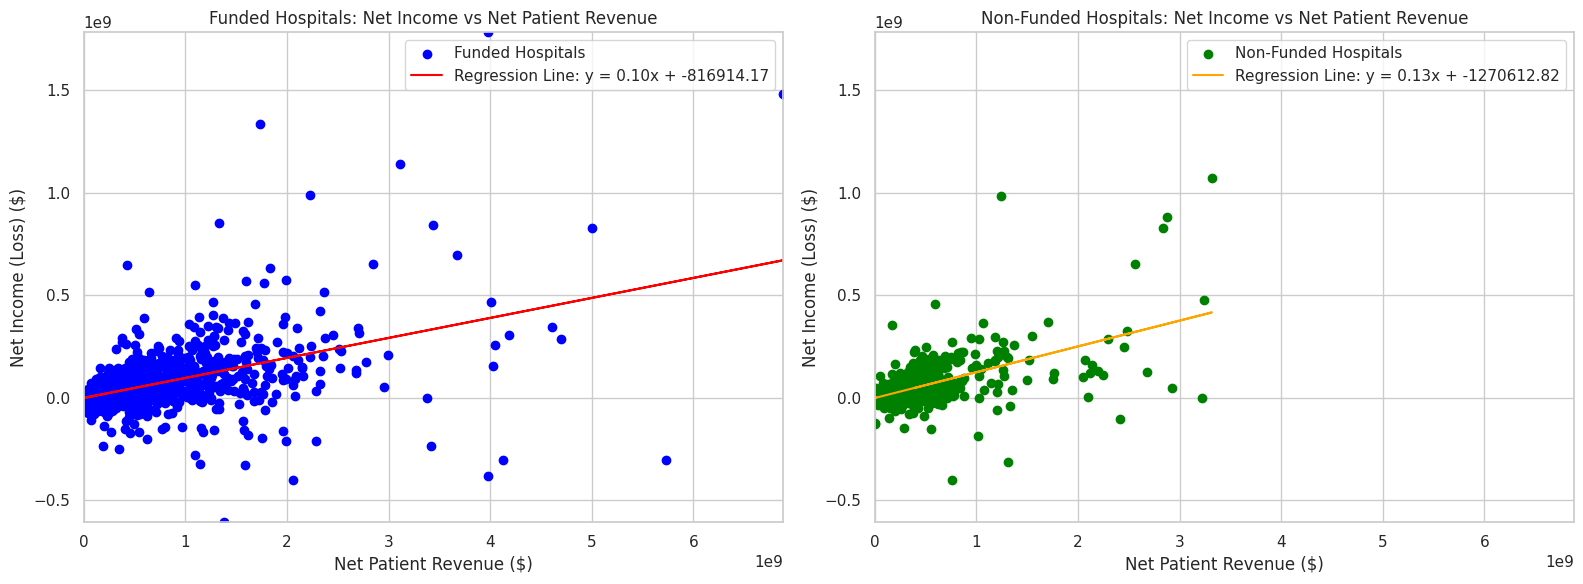

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_funded = funded_hospitals['Net Patient Revenue'].values.reshape(-1, 1)
y_funded = funded_hospitals['Net Income (Loss)'].values.reshape(-1, 1)
reg_funded = LinearRegression().fit(X_funded, y_funded)
y_pred_funded = reg_funded.predict(X_funded)

# For non-funded hospitals
X_non_funded = non_funded_hospitals['Net Patient Revenue'].values.reshape(-1, 1)
y_non_funded = non_funded_hospitals['Net Income (Loss)'].values.reshape(-1, 1)
reg_non_funded = LinearRegression().fit(X_non_funded, y_non_funded)
y_pred_non_funded = reg_non_funded.predict(X_non_funded)

# Retrieve regression coefficients (slope and intercept) for both groups
funded_slope = reg_funded.coef_[0][0]
funded_intercept = reg_funded.intercept_[0]

non_funded_slope = reg_non_funded.coef_[0][0]
non_funded_intercept = reg_non_funded.intercept_[0]

# Step 3: Set common axis limits
x_min = min(X_funded.min(), X_non_funded.min())
x_max = max(X_funded.max(), X_non_funded.max())
y_min = min(y_funded.min(), y_non_funded.min())
y_max = max(y_funded.max(), y_non_funded.max())

# Step 4: Create subplots for side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for funded hospitals
ax[0].scatter(X_funded, y_funded, color='blue', label='Funded Hospitals')
ax[0].plot(X_funded, y_pred_funded, color='red', label=f'Regression Line: y = {funded_slope:.2f}x + {funded_intercept:.2f}')
ax[0].set_title('Funded Hospitals: Net Income vs Net Patient Revenue')
ax[0].set_xlabel('Net Patient Revenue ($)')
ax[0].set_ylabel('Net Income (Loss) ($)')
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].legend()
ax[0].grid(True)

# Plot for non-funded hospitals
ax[1].scatter(X_non_funded, y_non_funded, color='green', label='Non-Funded Hospitals')
ax[1].plot(X_non_funded, y_pred_non_funded, color='orange', label=f'Regression Line: y = {non_funded_slope:.2f}x + {non_funded_intercept:.2f}')
ax[1].set_title('Non-Funded Hospitals: Net Income vs Net Patient Revenue')
ax[1].set_xlabel('Net Patient Revenue ($)')
ax[1].set_ylabel('Net Income (Loss) ($)')
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

For funded hospitals, the regression shows that for every additional billion dollars in Net Patient Revenue, Net Income increases by 0.1 billion USD. In contrast, for non-funded hospitals, each additional billion dollars of Net Patient Revenue results in a 0.13 billion USD increase in Net Income, indicating that non-funded hospitals experience faster growth in net income compared to funded hospitals. Regarding their intercepts, both exhibit negative values, but the funded hospitals have a smaller deficit than non-funded hospitals. This suggests that, although non-funded hospitals see a higher rate of income growth per dollar of revenue, their overall financial position is weaker than that of funded hospitals, particularly at lower revenue levels.

In [ ]:
mean = filtered_df['Net Patient Revenue'].mean()
mean

229958107.07435492

In [ ]:
# find the threshold
from sympy import symbols, Eq, solve

# Define the variable and equations
x = symbols('x')
eq1 = Eq(0.1 * x - 816914.17, 0.13 * x - 1270612.82)

# Solve the equation
solution = solve(eq1, x)
solution

[15123288.3333333]

When Net Patient Revenue is exactly equal to the threshold of 15,123,288.33 USD, funded and non-funded hospitals achieve the same Net Income. When revenue exceeds the threshold, the non-funded hospitals experience higher Net Income, whereas when revenue is below the threshold, funded hospitals have a higher Net Income. In this case, the average Net Patient Revenue is higher than the threshold, so non-funded hospitals achieve greater Net Income as well.

The reason behind this may be similar: since non-funded hospitals do not receive external funding, they are more dependent on Net Patient Revenue, meaning each additional dollar of revenue has a stronger impact on their net income. Alternatively, it could be due to diminishing returns—funded hospitals may already have a stable financial base, so the effect of additional patient revenue on their net income diminishes as they rely on other financial resources.

## **B. Funding Allocation**

### 1.How is the Covid funding disparities in the United States?

In [ ]:
NASHP_covid['COVID-19 PHE Funding'] = pd.to_numeric(NASHP_covid['COVID-19 PHE Funding'], errors='coerce')

# Step 1: Summarize funding by state
funds_by_state = NASHP_covid.groupby('State')['COVID-19 PHE Funding'].sum().reset_index()

# Step 2: Create a Choropleth map using Plotly Express
fig = px.choropleth(
    funds_by_state,
    locations='State',
    locationmode='USA-states',
    color='COVID-19 PHE Funding',
    scope='usa',
    labels={'Fund Balance': 'Total Fund Balance (in Millions USD)'},
    title='Total Fund Balance by State'
)

fig.show()

States like California and New York appear in lighter colors, suggesting they received higher total fund balances, likely due to their larger populations or greater financial needs during the pandemic. In contrast, the darker purple shading across most central and southern states indicates comparatively lower funding, reflecting regional differences in healthcare demand or funding allocation.

### 2.How does COVID-19 PHE funding differ by hospital ownership type?

<ipython-input-30-561f36f9aa06>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




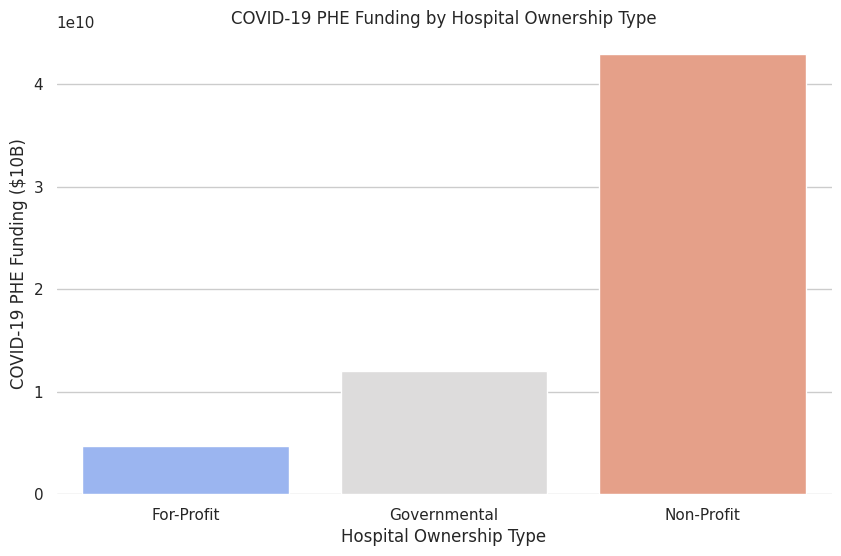

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Hospital Ownership Type' and calculate the total sum of 'COVID-19 PHE Funding'
funds_by_type = NASHP_covid.groupby('Hospital Ownership Type')['COVID-19 PHE Funding'].sum().sort_values()

# Create a bar chart with ascending order and blue color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=funds_by_type.index, y=funds_by_type.values, palette=("coolwarm"))

# Remove background grid and spines
sns.despine(left=True, bottom=True)

# Add labels and title to the plot
plt.title('COVID-19 PHE Funding by Hospital Ownership Type')
plt.xlabel('Hospital Ownership Type')
plt.ylabel('COVID-19 PHE Funding ($10B)')

plt.show()


Hospitals' COVID-19 Public Health Emergency (PHE) financing is compared in the bar chart according to ownership type.
With almost 40 billion dollars in investment, non-profit hospitals accounted for the greatest portion of COVID-19 PHE money.
15 billion dollars was allocated to government hospitals, a moderate amount given their role in public health initiatives.
Hospitals that are for-profit were given the least money—less than $10 billion.
The increased funding provided to nonprofit hospitals during the COVID-19 epidemic is highlighted in this graphic, highlighting their crucial role in public health responses.

### 3.How does COVID-19 PHE funding differ by hospital bed size?

<ipython-input-31-99030ebdceea>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-31-99030ebdceea>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-31-99030ebdceea>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Mean COVID-19 PHE Funding by Bed Size Range')

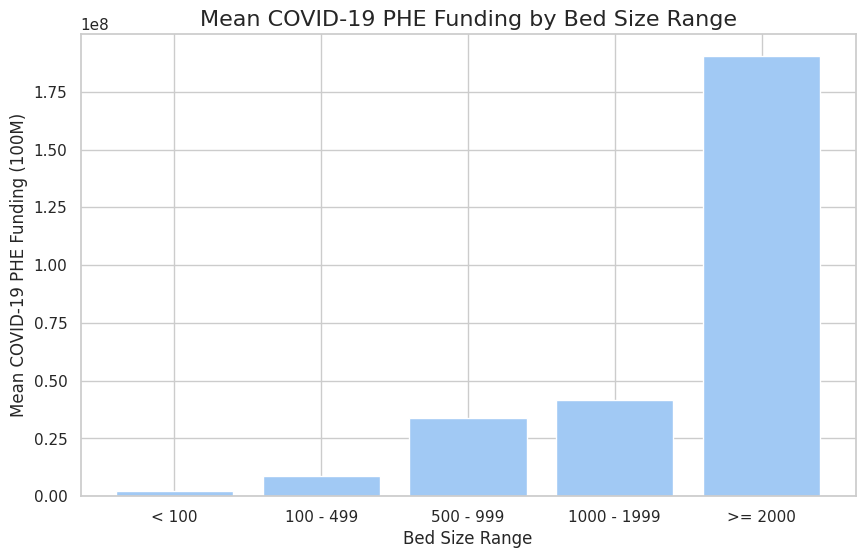

In [ ]:
# Filter the dataset based on bed size categories
bed_size_below100 = NASHP_covid[NASHP_covid['Bed Size'] < 100]
bed_size_100_and_500 = NASHP_covid[(NASHP_covid['Bed Size'] >= 100) & (NASHP_covid['Bed Size'] < 500)]
bed_size_500_and_1000 = NASHP_covid[(NASHP_covid['Bed Size'] >= 500) & (NASHP_covid['Bed Size'] < 1000)]
bed_size_1000_and_2000 = NASHP_covid[(NASHP_covid['Bed Size'] >= 1000) & (NASHP_covid['Bed Size'] < 2000)]
bed_size_above2000 = NASHP_covid[NASHP_covid['Bed Size'] >= 2000]

# Calculate the mean COVID-19 PHE Funding for each bed size range
fund_below100mean = bed_size_below100['COVID-19 PHE Funding'].mean()
fund_100_500mean = bed_size_100_and_500['COVID-19 PHE Funding'].mean()
fund_500_1000mean = bed_size_500_and_1000['COVID-19 PHE Funding'].mean()
fund_1000_2000mean = bed_size_1000_and_2000['COVID-19 PHE Funding'].mean()
fund_above2000mean = bed_size_above2000['COVID-19 PHE Funding'].mean()

# Define the bed size ranges and corresponding mean funding values
bed_size_ranges = ['< 100', '100 - 499', '500 - 999', '1000 - 1999', '>= 2000']
fund_balances_means = [
    fund_below100mean,
    fund_100_500mean,
    fund_500_1000mean,
    fund_1000_2000mean,
    fund_above2000mean
]

# Create a bar chart to visualize the mean funding by bed size range
plt.figure(figsize=(10, 6))
bars = plt.bar(bed_size_ranges, fund_balances_means)

# Set a color palette for the bars
palette = sns.set_palette("coolwarm")

# Add labels and title to the plot
plt.xlabel('Bed Size Range', fontsize=12)
plt.ylabel('Mean COVID-19 PHE Funding (100M)', fontsize=12)
plt.title('Mean COVID-19 PHE Funding by Bed Size Range', fontsize=16)



Hospitals' average COVID-19 Public Health Emergency (PHE) funding is shown in a bar chart that is broken down by bed size range.
The hospitals with the greatest average budget, close to 180 million dollars, were those with 2,000 beds or more. This is a reflection of the larger patient capacity and increased resource demand that larger hospitals experienced during the pandemic. The financing level for hospitals with 1,000–1,999 beds was moderate, averaging $100 million. Funding for hospitals with 500 - 999 beds was somewhat less, averaging about 75 million dollars. The least amount of financing went to smaller hospitals with 100 - 499 beds and fewer than 100 beds, while the hospitals with the smallest bed range received very little money.
The graph makes a very evident trend: larger hospitals earned much more PHE money than smaller ones because of their ability to care for a greater number of patients.

### 4.How does COVID-19 PHE funding relate to inpatient occupancy among different hospital ownership types?

In [ ]:
# Step 1: Group and aggregate data by State and Hospital Ownership Type
grouped = NASHP_covid.groupby(['State', 'Hospital Ownership Type']).agg({
    'COVID-19 PHE Funding': 'sum',
    'Inpatient Occupancy': 'mean',
}).reset_index()

# Step 2: Apply KMeans Clustering
features = grouped[['COVID-19 PHE Funding', 'Inpatient Occupancy']]

kmeans = KMeans(n_clusters=4, random_state=0)
grouped['Cluster'] = kmeans.fit_predict(features)

cluster_names = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4'
}
grouped['Cluster Name'] = grouped['Cluster'].map(cluster_names)

# Step 3: Visualize Using Bokeh
output_notebook()

# Convert DataFrame to Bokeh ColumnDataSource
source = ColumnDataSource(grouped)

plot = figure(title="Hospital Clustering Based on COVID-19 PHE Funding and Bed Occupancy by Ownership Type",
              x_axis_label="COVID-19 PHE Funding", y_axis_label="Inpatient Occupancy",
              width=800, height=600)

ownership_types = ['Governmental', 'For-Profit', 'Non-Profit']
colors = {'Governmental': Category10[3][0], 'For-Profit': Category10[3][1], 'Non-Profit': Category10[3][2]}

for ownership_type in ownership_types:
    ownership_data = grouped[grouped['Hospital Ownership Type'] == ownership_type]
    ownership_source = ColumnDataSource(ownership_data)
    plot.scatter(x='COVID-19 PHE Funding', y='Inpatient Occupancy', source=ownership_source,
                 color=colors[ownership_type], legend_label=ownership_type, size=10, alpha=0.6)

# Add hover tool to display detailed information for each point
hover = HoverTool()
hover.tooltips = [
    ("State", "@State"),
    ("Ownership Type", "@{Hospital Ownership Type}"),
    ("Cluster", "@{Cluster Name}"),
    ("COVID-19 PHE Funding", "@{COVID-19 PHE Funding}{0,0}"),
    ("Inpatient Occupancy", "@{Inpatient Occupancy}{0.0}")
]
plot.add_tools(hover)
plot.legend.location = "top_left"
plot.legend.click_policy = "mute"

show(plot)

The scatter plot shows that non-profit hospitals (green) tend to receive a wide range of funding levels, with some receiving significantly higher amounts. Their inpatient occupancy rates also vary considerably, indicating diverse responses to the funding.

In contrast, governmental hospitals (blue) and for-profit hospitals (orange) generally receive lower COVID-19 PHE funding. Governmental hospitals show moderate variability in occupancy, whereas for-profit hospitals are mostly clustered at lower funding levels and lower occupancy rates, suggesting fewer resources and a lower level of activity.

### 5.What deeper insights can be drawn from analyzing the clusters？

        COVID-19 PHE Funding                                        \
                        mean           std         min         max   
Cluster                                                              
0               8.002164e+08  2.596769e+08   489595102  1399151305   
1               6.465073e+09           NaN  6465072525  6465072525   
2               1.457484e+08  1.268791e+08           0   440343404   
3               2.171563e+09  5.806586e+08  1620467781  3401193063   

        Inpatient Occupancy                                
                       mean       std       min       max  
Cluster                                                    
0                  0.512630  0.094946  0.294931  0.693117  
1                  0.577342       NaN  0.577342  0.577342  
2                  0.412634  0.132848  0.016384  0.840193  
3                  0.519805  0.076918  0.413851  0.643896  


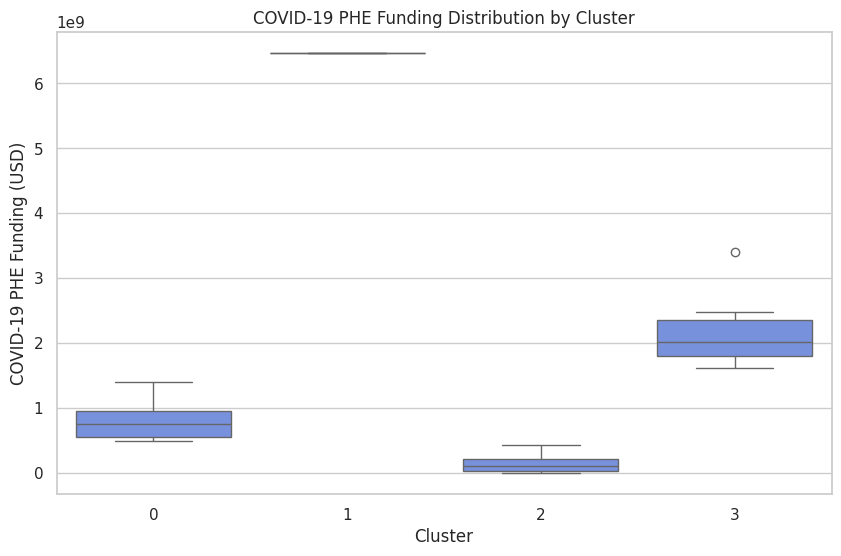

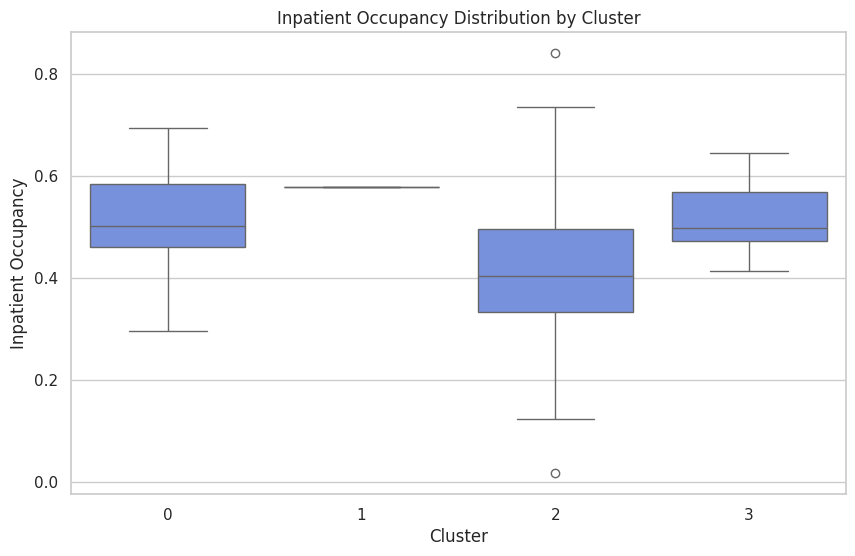

Hospital Ownership Type  For-Profit  Governmental  Non-Profit
Cluster                                                      
0                               2.0           3.0        20.0
1                               0.0           0.0         1.0
2                              43.0          41.0        24.0
3                               0.0           2.0         6.0


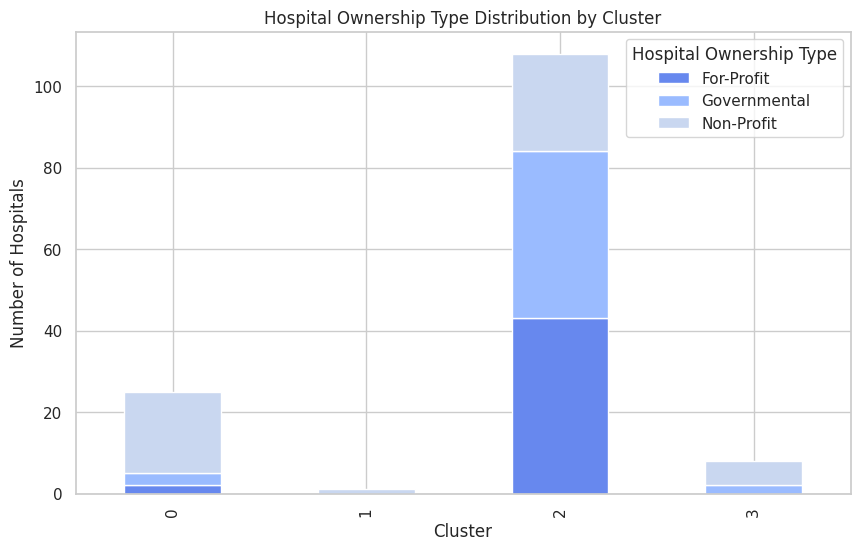

In [ ]:
# Step 1: groupby
descriptive_stats = grouped.groupby('Cluster').agg({
    'COVID-19 PHE Funding': ['mean', 'std', 'min', 'max'],
    'Inpatient Occupancy': ['mean', 'std', 'min', 'max']
})
print(descriptive_stats)

# Step 2: Visualizing Cluster Characteristics
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped, x='Cluster', y='COVID-19 PHE Funding')
plt.title('COVID-19 PHE Funding Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('COVID-19 PHE Funding (USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped, x='Cluster', y='Inpatient Occupancy')
plt.title('Inpatient Occupancy Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Inpatient Occupancy')
plt.show()

# Step 3: Analyzing Hospital Ownership Types in Each Cluster
ownership_distribution = grouped.groupby(['Cluster', 'Hospital Ownership Type']).size().unstack().fillna(0)
print(ownership_distribution)

# Step 4: Plotting Ownership Distribution by Cluster
ownership_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Hospital Ownership Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Hospitals')
plt.legend(title='Hospital Ownership Type')
plt.show()

Cluster 0 and Cluster 3 are largely made up of non-profit hospitals. Despite differing levels of funding, both clusters maintained stable bed occupancy rates, suggesting that non-profit hospitals managed to sustain service quality effectively even when funds were limited. Their resilience highlights the efficiency of resource management among non-profits during times of crisis.

Cluster 2 is primarily composed of governmental and for-profit hospitals, which received lower funding and had lower bed occupancy rates. This may indicate that these hospitals experienced less operational pressure during the pandemic. Due to limited funding, they faced challenges in resource allocation and service provision, making it difficult to meet higher patient demand.

Cluster 1 includes a small group of hospitals—mostly non-profits—with the highest levels of funding, yet they also showed relatively high occupancy rates. This could imply that despite receiving substantial funding, these hospitals faced heightened demand that may have pushed them to the limits of their capacity, pointing to the need for further assessment of funding sufficiency during times of crisis.

## **C.Summary for Detailed Analysis**

In Section A, we first focus on comparing key financial metrics between funded and non-funded hospitals to evaluate the impact of COVID-19 relief funding on financial outcomes such as operating costs, revenue, and recovery. This section is crucial for understanding the direct influence of funding on hospitals' financial health during the pandemic.

Section B moves beyond financial outcomes to examine how COVID-19 funding was distributed across different hospitals. It looks at disparities in funding based on hospital ownership type, bed size, and geographical location, providing a deeper insight into how funding allocation was influenced by hospital characteristics. This sequential approach allows us to understand both the outcomes of funding on hospital performance and the fairness of its distribution.

# V. Conclusion

This report investigates the financial dynamics of U.S. hospitals during the COVID-19 pandemic, focusing on how external funding, particularly the COVID-19 public health emergency (PHE) funding, impacted hospitals' capacity to respond to the crisis while maintaining community health resilience. By analyzing hospital financial data, infection rates, and Provider Relief Fund (PRF) distribution, the study reveals the relationship between financial support, operational efficiency, and patient care during an unprecedented public health emergency.

Through a variety of graphical analyses, we have highlighted key financial indicators and aspects of hospital operations. The notable decline and subsequent rebound in inpatient occupancy during the COVID-19 period underscore the pandemic's direct effect on hospital utilization. We also explored the disparities in funding eligibility across regions and how these disparities influenced hospitals' ability to cope with the crisis. Our visualizations provide insights into the financial preparedness of hospitals pre-pandemic, the funding disparities among different states, and the operational pressures faced by hospitals as COVID-19 cases surged.

The findings offer a foundational understanding of how healthcare funding influences hospitals' ability to respond to crises in real time. Looking ahead, our forthcoming analysis will specifically focus on state-level COVID funding distribution, regional characteristics related to COVID-19, and the broader implications of government support on hospital financial stability. By merging datasets and exploring these relationships further, we aim to provide actionable insights to inform future public health strategies and optimize the allocation of relief funds to improve hospital resilience and preparedness for future emergencies.

# VI. Challenges

1. Isolating the impact of COVID-19 funding was challenging due to other concurrent variables influencing hospital finances, such as changes in healthcare policies, variations in state-level responses, and fluctuations in local economies.

3. Computational constraints and processing large datasets required significant resources. Running complex models and simulations sometimes limited the extent of exploratory data analysis we could perform.

3. Identifying two strongly related variables for regression analysis and analyzing the implications behind the regression model between variables.



# VII. Limitations





1. Not all available columns from the dataset were included in the analysis. By only selecting specific columns, certain aspects of hospital finances and operations may have been overlooked, potentially affecting the completeness of the insights.
2. The analysis does not encompass all the years during the COVID-19 pandemic. This means some phases of the pandemic, which could have significant impacts on hospital funding and patient care costs, may not be fully represented.
3. The dataset may not capture all hospitals equally or could have incomplete data for some hospitals, potentially introducing sampling bias.
4. The analysis is primarily correlational and does not establish a causal relationship between COVID-19 funding and hospital financial performance. Other unmeasured factors may contribute to the observed outcomes.


#VIII. Reference

1. Statista. (Feb 28, 2024). Coronavirus (COVID-19) disease pandemic- Statistics & Facts. https://www.statista.com/topics/5994/the-coronavirus-disease-covid-19-outbreak/#topicOverview

2. USAFACTS. (Jul 23, 2024). US COVID-19 cases and deaths by state. https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

#IX. Generative AI disclosure

In completing this project, we utilized Generative AI tools to assist with various aspects of our work. Below is a summary of how these tools were employed:


*   Content Generation: We used ChatGPT to brainstorm ideas of the project and suggest chart types to include in each section. We also used AI to assist us in writing comment statements in between our python codes for better explanation and documentation.
*   Code Review and Debugging: We leveraged GitHub Copilot and ChatGPT to suggest improvements to our Python code, optimizing algorithms and resolving potential errors.
*   Proofreading and Grammar Checks: We utilized Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.


Our team has carefully reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality, adhering to academic integrity guidelines.